In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
try:
    from data.wine.Wine_Quality_Data import *
except ModuleNotFoundError:
    from Wine_Quality_Data import *
    
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
%config IPCompleter.greedy=True


In [2]:
wine = import_wine_dataset()

In [3]:
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


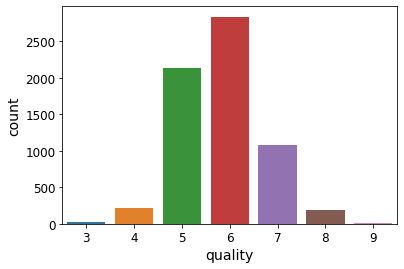

quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: quality, dtype: float64


In [4]:
sns.countplot(x='quality', data=wine)
plt.show()
print(wine.groupby('quality')['quality'].apply(lambda x: x.count()/wine.shape[0]))

# Convert to low aveage high qualities
wine = change_labels_low_avg_high(wine)

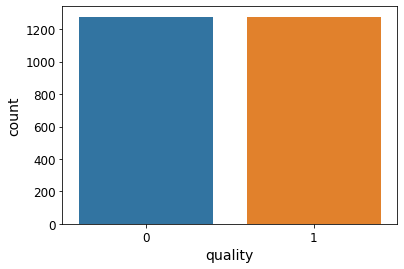

quality
0    0.5
1    0.5
Name: quality, dtype: float64


In [5]:
sns.countplot(x='quality', data=wine)
plt.show()
print(wine.groupby('quality')['quality'].apply(lambda x: x.count()/wine.shape[0]))

In [6]:
if False:
    # Evenly Split data to target categories
    sns.countplot(x='quality', data=wine)
    plt.show()
    print(wine.groupby('quality')['quality'].apply(lambda x: x.count()/wine.shape[0]))

    test = wine.groupby('quality').apply(lambda x: x.sample(min(wine.groupby('quality')['quality'].count()))).reset_index(drop=True)

    sns.countplot(x='quality', data=test)
    plt.show()
    print(test.groupby('quality')['quality'].apply(lambda x: x.count()/test.shape[0]))

    wine = test

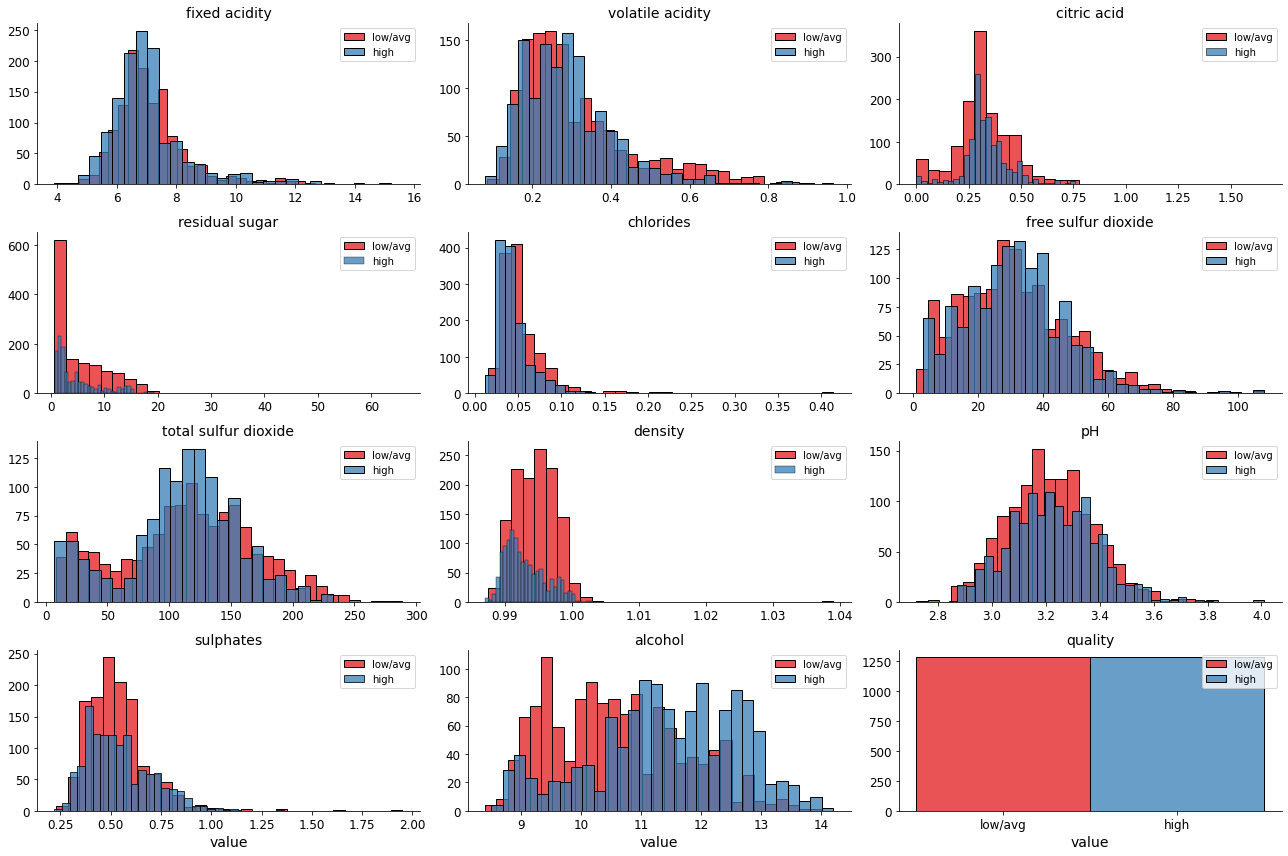

In [7]:
new_wine = wine.copy()
new_wine['quality'] = new_wine['quality'].map({0: 'low/avg', 1: 'high', 2: 'None'})
new_wine['quality_index'] = new_wine['quality']

# plot code from https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
df2 = pd.melt(new_wine, id_vars='quality_index', value_vars=new_wine.drop("quality_index", axis=1).columns, value_name='value')

g = sns.FacetGrid(df2, col="variable", hue="quality_index", hue_order = ["low/avg", "high", "None"], palette="Set1", col_wrap=3, sharex=False, sharey=False, aspect=2)
g.map(sns.histplot, 'value', bins=30)
for a in g.axes:
    a.legend()

# Found at https://github.com/mwaskom/seaborn/issues/440
plt.setp(g.fig.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.show()


In [8]:
if False:
    # Takes a long time to run
    new_wine = wine.copy()
    new_wine['quality'] = new_wine['quality'].map({0: 'low/avg', 1: 'high', 2: 'None'})
    sns.pairplot(new_wine, hue="quality", hue_order = ["low/avg", "high", "None"], palette="Set1")

In [9]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.345685
citric acid             0.041000
sulphates               0.032154
pH                      0.030905
free sulfur dioxide    -0.008151
fixed acidity          -0.042256
total sulfur dioxide   -0.044393
residual sugar         -0.081118
volatile acidity       -0.097150
chlorides              -0.184322
density                -0.244828
Name: quality, dtype: float64

In [10]:
# Model Testing
from sklearn.pipeline import Pipeline
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
import time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2043 non-null   float64
 1   volatile acidity      2043 non-null   float64
 2   citric acid           2043 non-null   float64
 3   residual sugar        2043 non-null   float64
 4   chlorides             2043 non-null   float64
 5   free sulfur dioxide   2043 non-null   float64
 6   total sulfur dioxide  2043 non-null   float64
 7   density               2043 non-null   float64
 8   pH                    2043 non-null   float64
 9   sulphates             2043 non-null   float64
 10  alcohol               2043 non-null   float64
dtypes: float64(11)
memory usage: 175.7 KB
None


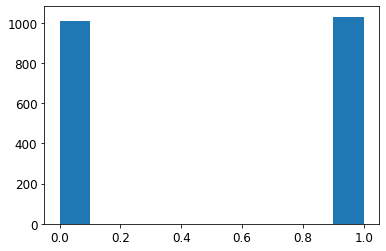

In [11]:
X_train, X_test, y_train, y_test = get_normalized_train_test_split(wine)
print(X_train.info())
plt.hist(y_train)
plt.show()


In [12]:
import common_data_analysis

KFold_Score, classifiers, time_taken = common_data_analysis.kfolds_basic_test_all_classifiers(X_train, y_train, scoring="accuracy")
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

Running: rbf SVM
Time Taken: 0.4256744384765625
Running: NeuralNetwork
Time Taken: 9.780595302581787
Running: DecisionTree
Time Taken: 0.08440876007080078
Running: KNeighborsClassifier
Time Taken: 0.10512685775756836
Running: RandomForestClassifier
Time Taken: 2.3883743286132812
Running: AdaBoost
Time Taken: 0.6159827709197998
Final Time elapsed 13.40077805519104
[0.49534998 0.50465002]
Number of Instances 2043
rbf SVM 		0.425739049911499 seconds
NeuralNetwork 		9.780915975570679 seconds
DecisionTree 		0.08446311950683594 seconds
KNeighborsClassifier 		0.1051797866821289 seconds
RandomForestClassifier 		2.3884356021881104 seconds
AdaBoost 		0.6160416603088379 seconds


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.743276,0.738386,0.753056,0.723039,0.776961,0.746944
AdaBoost,0.694377,0.696822,0.679707,0.661765,0.725490,0.691632
rbf SVM,0.718826,0.635697,0.660147,0.700980,0.720588,0.687248
NeuralNetwork,0.696822,0.633252,0.638142,0.713235,0.703431,0.676976
DecisionTree,0.689487,0.657702,0.716381,0.639706,0.676471,0.675949
KNeighborsClassifier,0.694377,0.643032,0.682152,0.642157,0.674020,0.667147


In [29]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.762836,0.726161,0.760391,0.769608,0.754902,0.754780
rbf SVM,0.694377,0.665037,0.728606,0.715686,0.723039,0.705349
DecisionTree,0.721271,0.672372,0.687042,0.703431,0.708333,0.698490
KNeighborsClassifier,0.687042,0.696822,0.699267,0.683824,0.700980,0.693587
AdaBoost,0.674817,0.689487,0.704156,0.688725,0.703431,0.692123
NeuralNetwork,0.679707,0.672372,0.726161,0.686275,0.696078,0.692119


[0.49534998 0.50465002]
Number of Instances 2043
rbf SVM 		0.37670230865478516 seconds
NeuralNetwork 		10.79151177406311 seconds
DecisionTree 		0.08284616470336914 seconds
KNeighborsClassifier 		0.1046900749206543 seconds
RandomForestClassifier 		2.3952221870422363 seconds
AdaBoost 		0.6180899143218994 seconds


In [15]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.797066,0.792176,0.816626,0.806373,0.823529,0.807154
rbf SVM,0.765281,0.740831,0.782396,0.789216,0.789216,0.773388
AdaBoost,0.775061,0.743276,0.750611,0.747549,0.759804,0.755260
NeuralNetwork,0.733496,0.735941,0.753056,0.789216,0.754902,0.753322
DecisionTree,0.733496,0.765281,0.704156,0.740196,0.772059,0.743038
KNeighborsClassifier,0.728606,0.711491,0.753056,0.762255,0.750000,0.741082


[0.49534998 0.50465002]
Number of Instances 2043
rbf SVM 		0.28989291191101074 seconds
NeuralNetwork 		10.162629842758179 seconds
DecisionTree 		0.08129239082336426 seconds
KNeighborsClassifier 		0.10510063171386719 seconds
RandomForestClassifier 		2.6495559215545654 seconds
AdaBoost 		0.6308865547180176 seconds


In [59]:
random_forest = RandomForestClassifier(n_estimators=200, random_state=0)
random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test)

from sklearn.metrics import confusion_matrix

predict = random_forest.predict(X_test)
print(confusion_matrix(y_test,predict))

from sklearn.metrics import precision_score, recall_score
p = precision_score(y_test, predict, average="micro")
r = recall_score(y_test, predict, average="micro")

print("precision: ", p, " recal: ", r)

[[240 241]
 [ 97 376]]
precision:  0.6457023060796646  recal:  0.6457023060796646


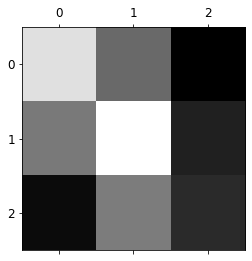

In [17]:
predict = random_forest.predict(X_test)
conf_mx = confusion_matrix(y_test, predict)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


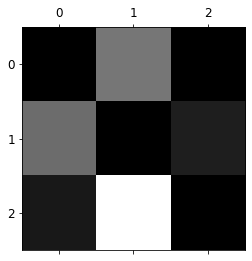

In [18]:
rows_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / rows_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [50]:
print(X_train.shape)

(5197, 11)


In [230]:
if True:
    os.environ["CUDA_VISIBLE_DEVICES"]="-1"
    import tensorflow as tf
else:
    os.environ["CUDA_VISIBLE_DEVICES"]="0"
    import tensorflow as tf
    physical_devices = tf.config.list_physical_devices('GPU') 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [231]:
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [232]:
def build_fn(optimizer, number_nodes, number_layers):
    model = keras.Sequential()
    model.add(Dense(number_nodes, input_dim=11, kernel_initializer="he_normal", activation="relu"))
    for i in range(number_layers):
        model.add(Dense(number_nodes, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(3, kernel_initializer="he_normal", activation="sigmoid"))
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=[
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
            keras.metrics.BinaryAccuracy(name="accuracy")
        ],
    )
    return model

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [273]:


number_nodes = [i for i in range(1, 30, 2)]
number_layers = [i for i in range(1, 20, 2)]
print(number_nodes)
print(number_layers)
kernel_initializer=['random_normal','he_normal']

parameters = {'number_nodes': number_nodes, 'number_layers': number_layers}

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [277]:
with strategy.scope():
    opt = keras.optimizers.Adam(learning_rate=0.01)
    clf = KerasClassifier(build_fn, optimizer="adam", epochs=100, batch_size=32, number_nodes=2, number_layers=2)

    gs = GridSearchCV(clf, parameters, return_train_score=True, verbose=10, n_jobs=-1)
    gs.fit(X_train, y_train, validation_data=(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 19

Epoch 1/100
163/163 [==============================] - 5s 13ms/step - loss: 0.9791 - precision: 0.4533 - recall: 0.7835 - auc: 0.6874 - accuracy: 0.6129 - val_loss: 0.8910 - val_precision: 0.4806 - val_recall: 0.8392 - val_auc: 0.7274 - val_accuracy: 0.6441
Epoch 2/100
163/163 [==============================] - 1s 5ms/step - loss: 0.8807 - precision: 0.4768 - recall: 0.8260 - auc: 0.7354 - accuracy: 0.6399 - val_loss: 0.8941 - val_precision: 0.4895 - val_recall: 0.8077 - val_auc: 0.7261 - val_accuracy: 0.6551
Epoch 3/100
163/163 [==============================] - 1s 5ms/step - loss: 0.8656 - precision: 0.4821 - recall: 0.8390 - auc: 0.7380 - accuracy: 0.6458 - val_loss: 0.8849 - val_precision: 0.4877 - val_recall: 0.8385 - val_auc: 0.7261 - val_accuracy: 0.6526
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 0.8550 - precision: 0.4817 - recall: 0.8448 - auc: 0.7357 - accuracy: 0.6454 - val_loss: 0.8893 - val_precision: 0.4809 - val_recall: 0.8046 - val_auc: 0

Epoch 33/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7763 - precision: 0.5011 - recall: 0.8735 - auc: 0.7815 - accuracy: 0.6679 - val_loss: 1.4312 - val_precision: 0.4450 - val_recall: 0.8315 - val_auc: 0.6876 - val_accuracy: 0.5982
Epoch 34/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7721 - precision: 0.4996 - recall: 0.8648 - auc: 0.7817 - accuracy: 0.6661 - val_loss: 1.3849 - val_precision: 0.4525 - val_recall: 0.8308 - val_auc: 0.6931 - val_accuracy: 0.6085
Epoch 35/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7609 - precision: 0.5033 - recall: 0.8666 - auc: 0.7862 - accuracy: 0.6704 - val_loss: 1.2960 - val_precision: 0.4600 - val_recall: 0.8569 - val_auc: 0.7060 - val_accuracy: 0.6169
Epoch 36/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7604 - precision: 0.5021 - recall: 0.8722 - auc: 0.7843 - accuracy: 0.6691 - val_loss: 1.4187 - val_precision: 0.4641 - val_recall: 0.8162 - val_auc

Epoch 65/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7023 - precision: 0.5143 - recall: 0.8780 - auc: 0.8085 - accuracy: 0.6829 - val_loss: 2.4926 - val_precision: 0.4390 - val_recall: 0.7831 - val_auc: 0.6705 - val_accuracy: 0.5941
Epoch 66/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6885 - precision: 0.5166 - recall: 0.8827 - auc: 0.8156 - accuracy: 0.6856 - val_loss: 2.8409 - val_precision: 0.4349 - val_recall: 0.7808 - val_auc: 0.6693 - val_accuracy: 0.5887
Epoch 67/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6965 - precision: 0.5102 - recall: 0.8734 - auc: 0.8052 - accuracy: 0.6782 - val_loss: 2.6773 - val_precision: 0.4473 - val_recall: 0.7808 - val_auc: 0.6718 - val_accuracy: 0.6054
Epoch 68/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6867 - precision: 0.5171 - recall: 0.8734 - auc: 0.8128 - accuracy: 0.6859 - val_loss: 3.0844 - val_precision: 0.4398 - val_recall: 0.7392 - val_auc

Epoch 97/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6127 - precision: 0.5350 - recall: 0.8893 - auc: 0.8423 - accuracy: 0.7055 - val_loss: 4.0886 - val_precision: 0.4361 - val_recall: 0.7638 - val_auc: 0.6612 - val_accuracy: 0.5921
Epoch 98/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6334 - precision: 0.5316 - recall: 0.8945 - auc: 0.8347 - accuracy: 0.7021 - val_loss: 3.9817 - val_precision: 0.4341 - val_recall: 0.7569 - val_auc: 0.6601 - val_accuracy: 0.5900
Epoch 99/100
163/163 [==============================] - 1s 6ms/step - loss: 0.6054 - precision: 0.5337 - recall: 0.8821 - auc: 0.8403 - accuracy: 0.7038 - val_loss: 3.9575 - val_precision: 0.4407 - val_recall: 0.7169 - val_auc: 0.6511 - val_accuracy: 0.6023
Epoch 100/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6085 - precision: 0.5361 - recall: 0.8927 - auc: 0.8432 - accuracy: 0.7067 - val_loss: 3.9480 - val_precision: 0.4401 - val_recall: 0.7377 - val_au

In [303]:
from sklearn.model_selection import RandomizedSearchCV

opt = keras.optimizers.Adam(learning_rate=0.01)
clf = KerasClassifier(build_fn, optimizer="adam", epochs=100, batch_size=32, number_nodes=2, number_layers=2)

rgs = RandomizedSearchCV(clf, {'number_nodes': [i for i in range(1, 101)], 'number_layers':[i for i in range(1, 101)]}, n_iter = 200, return_train_score=True, verbose=10, n_jobs=-1)
rgs.fit(X_train, y_train, validation_data=(X_test, y_test))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 71

Epoch 1/100
163/163 [==============================] - 2s 7ms/step - loss: 0.9925 - precision: 0.4507 - recall: 0.7106 - auc: 0.6735 - accuracy: 0.6154 - val_loss: 0.9003 - val_precision: 0.4698 - val_recall: 0.8369 - val_auc: 0.7232 - val_accuracy: 0.6308
Epoch 2/100
163/163 [==============================] - 1s 5ms/step - loss: 0.9038 - precision: 0.4780 - recall: 0.7960 - auc: 0.7376 - accuracy: 0.6423 - val_loss: 0.8537 - val_precision: 0.4945 - val_recall: 0.8285 - val_auc: 0.7567 - val_accuracy: 0.6605
Epoch 3/100
163/163 [==============================] - 1s 5ms/step - loss: 0.8648 - precision: 0.4854 - recall: 0.8166 - auc: 0.7467 - accuracy: 0.6503 - val_loss: 0.8356 - val_precision: 0.4862 - val_recall: 0.8685 - val_auc: 0.7540 - val_accuracy: 0.6503
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 0.8526 - precision: 0.4840 - recall: 0.8477 - auc: 0.7454 - accuracy: 0.6480 - val_loss: 0.8790 - val_precision: 0.4833 - val_recall: 0.8815 - val_auc: 0.

Epoch 33/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7158 - precision: 0.5108 - recall: 0.8953 - auc: 0.7923 - accuracy: 0.6792 - val_loss: 1.0897 - val_precision: 0.4568 - val_recall: 0.7723 - val_auc: 0.6950 - val_accuracy: 0.6179
Epoch 34/100
163/163 [==============================] - 1s 5ms/step - loss: 0.6659 - precision: 0.5294 - recall: 0.9017 - auc: 0.8049 - accuracy: 0.7000 - val_loss: 1.0937 - val_precision: 0.4593 - val_recall: 0.7677 - val_auc: 0.6951 - val_accuracy: 0.6213
Epoch 35/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7049 - precision: 0.5165 - recall: 0.8933 - auc: 0.8027 - accuracy: 0.6857 - val_loss: 1.0616 - val_precision: 0.4556 - val_recall: 0.7338 - val_auc: 0.6868 - val_accuracy: 0.6190
Epoch 36/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7141 - precision: 0.5161 - recall: 0.8912 - auc: 0.8102 - accuracy: 0.6851 - val_loss: 1.0684 - val_precision: 0.4610 - val_recall: 0.7585 - val_auc

Epoch 65/100
163/163 [==============================] - 1s 5ms/step - loss: 0.5021 - precision: 0.5548 - recall: 0.9347 - auc: 0.8711 - accuracy: 0.7282 - val_loss: 2.5210 - val_precision: 0.4675 - val_recall: 0.7238 - val_auc: 0.6762 - val_accuracy: 0.6331
Epoch 66/100
163/163 [==============================] - 1s 5ms/step - loss: 0.4933 - precision: 0.5624 - recall: 0.9282 - auc: 0.8778 - accuracy: 0.7354 - val_loss: 4.3314 - val_precision: 0.4623 - val_recall: 0.7131 - val_auc: 0.6628 - val_accuracy: 0.6279
Epoch 67/100
163/163 [==============================] - 1s 5ms/step - loss: 0.4880 - precision: 0.5584 - recall: 0.9299 - auc: 0.8749 - accuracy: 0.7314 - val_loss: 2.2844 - val_precision: 0.4737 - val_recall: 0.6985 - val_auc: 0.6879 - val_accuracy: 0.6408
Epoch 68/100
163/163 [==============================] - 1s 5ms/step - loss: 0.4684 - precision: 0.5778 - recall: 0.9299 - auc: 0.8880 - accuracy: 0.7500 - val_loss: 2.6182 - val_precision: 0.4624 - val_recall: 0.7369 - val_auc

Epoch 97/100
163/163 [==============================] - 1s 5ms/step - loss: 0.2937 - precision: 0.7573 - recall: 0.9542 - auc: 0.9710 - accuracy: 0.8828 - val_loss: 3.4404 - val_precision: 0.4934 - val_recall: 0.6069 - val_auc: 0.6862 - val_accuracy: 0.6613
Epoch 98/100
163/163 [==============================] - 1s 5ms/step - loss: 0.2968 - precision: 0.7555 - recall: 0.9538 - auc: 0.9721 - accuracy: 0.8816 - val_loss: 3.7230 - val_precision: 0.4827 - val_recall: 0.5900 - val_auc: 0.6753 - val_accuracy: 0.6526
Epoch 99/100
163/163 [==============================] - 1s 5ms/step - loss: 0.2729 - precision: 0.7893 - recall: 0.9571 - auc: 0.9763 - accuracy: 0.9004 - val_loss: 6.4387 - val_precision: 0.4814 - val_recall: 0.5577 - val_auc: 0.6637 - val_accuracy: 0.6523
Epoch 100/100
163/163 [==============================] - 1s 5ms/step - loss: 0.2586 - precision: 0.7943 - recall: 0.9522 - auc: 0.9784 - accuracy: 0.9018 - val_loss: 4.6260 - val_precision: 0.4774 - val_recall: 0.6000 - val_au

RandomizedSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7efcd4446f70>,
                   n_iter=200, n_jobs=-1,
                   param_distributions={'number_layers': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...],
                                        'number_nodes': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                   

In [279]:
print(gs.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_number_layers', 'param_number_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


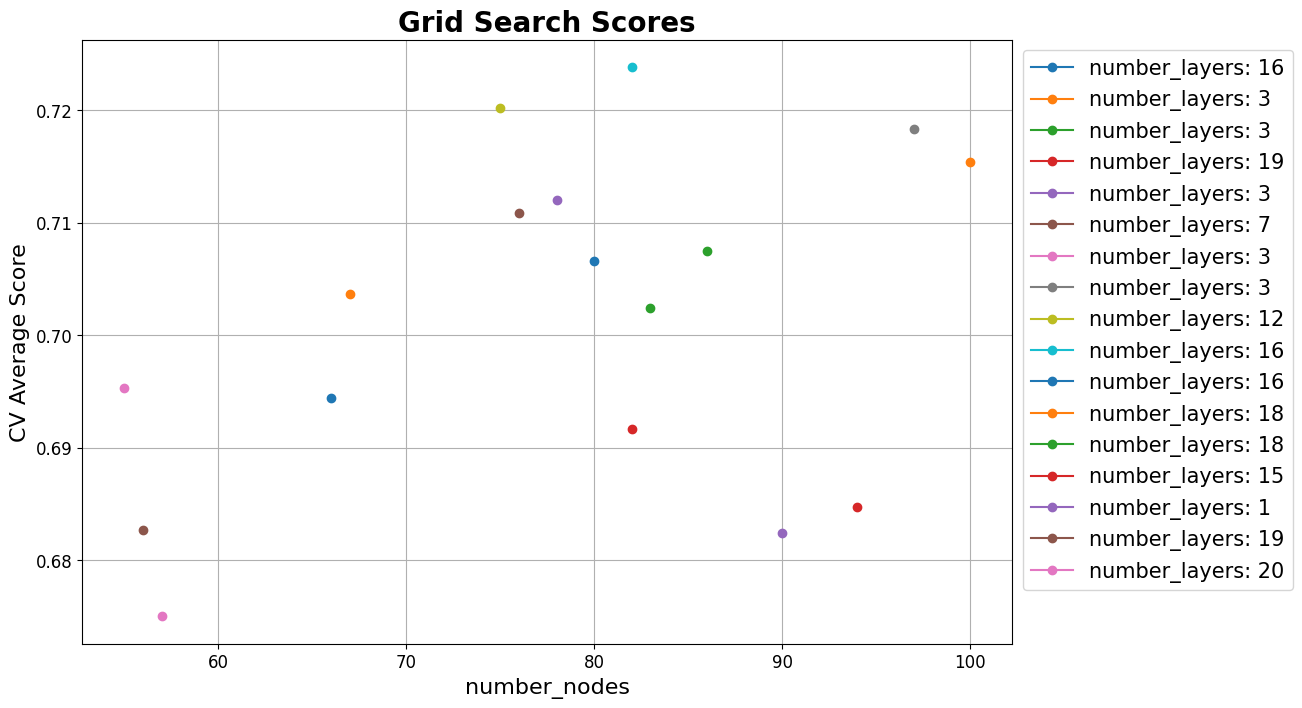

In [384]:
# From https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    global GLOBAL_FIG_COUNTER
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
    plt.savefig(PLOT_PREFIX + "GridScore_" + name_param_1 + "_" + name_param_2 + "_" + str(GLOBAL_FIG_COUNTER) + ".png")
    GLOBAL_FIG_COUNTER += 1

# From https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def plot_grid_search(cv_results, name_param_1, name_param_2):
    global GLOBAL_FIG_COUNTER
    # Get Test Scores Mean and std for each grid search
    grid_param_1 = np.unique(cv_results['param_' + name_param_1])
    grid_param_2 = np.unique(cv_results['param_' + name_param_2])
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot([int(i) for i in grid_param_1], scores_mean[idx,:], '-o', label= (name_param_2 + ': ' + str(val)))
    print("WHAT")
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
    plt.savefig(PLOT_PREFIX + "GridScore_" + name_param_1 + "_" + name_param_2 + "_" + str(GLOBAL_FIG_COUNTER) + ".png")
    GLOBAL_FIG_COUNTER += 1
    
# Calling Method 
# plot_grid_search(gs.cv_results_, epochs, batch_size, 'epochs', 'batch_size')
# plot_grid_search(gs.cv_results_, number_nodes, number_layers, 'number_nodes', 'number_layers')
# plot_grid_search(gs.cv_results_, 'number_nodes', 'number_layers')

def plot_grid_search(cv_results, name_param_1, name_param_2):
    global GLOBAL_FIG_COUNTER
    # Get Test Scores Mean and std for each grid search
    grid_param_1 = cv_results['param_' + name_param_1]
    grid_param_2 = cv_results['param_' + name_param_2]
    scores_mean = cv_results['mean_test_score']
    
    a = np.argwhere(grid_param_1.data >= 50)
    b = np.argwhere(grid_param_2.data <= 20)
    a = [i[0] for i in a]
    b = [i[0] for i in list(b)]
    ab = list(set(a) & set(b))
    grid_param_1 = grid_param_1[ab]
    grid_param_2 = grid_param_2[ab]
    scores_mean = scores_mean[ab]

    scores_sd = cv_results['std_test_score']

    # Plot Grid search scores
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for p1, p2, score in zip(grid_param_1, grid_param_2, scores_mean):
        ax.plot(p1, score, '-o', label= (name_param_2 + ': ' + str(p2)))
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15, bbox_to_anchor=(1,1))
    ax.grid('on')
    
    plt.savefig(PLOT_PREFIX + "GridScore_" + name_param_1 + "_" + name_param_2 + "_" + str(GLOBAL_FIG_COUNTER) + ".png")
    GLOBAL_FIG_COUNTER += 1

plot_grid_search(rgs.cv_results_, 'number_nodes', 'number_layers')

In [385]:
print(rgs.cv_results_.keys())
print(rgs.best_params_)
a = np.argwhere(rgs.cv_results_['param_number_layers'].data <= 20)
b = np.argwhere(rgs.cv_results_['param_number_nodes'].data >= 50)
a = [i[0] for i in a]
b = [i[0] for i in list(b)]
ab = set(a) & set(b)

print(ab)

TypeError: cannot pickle 'weakref' object

[[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

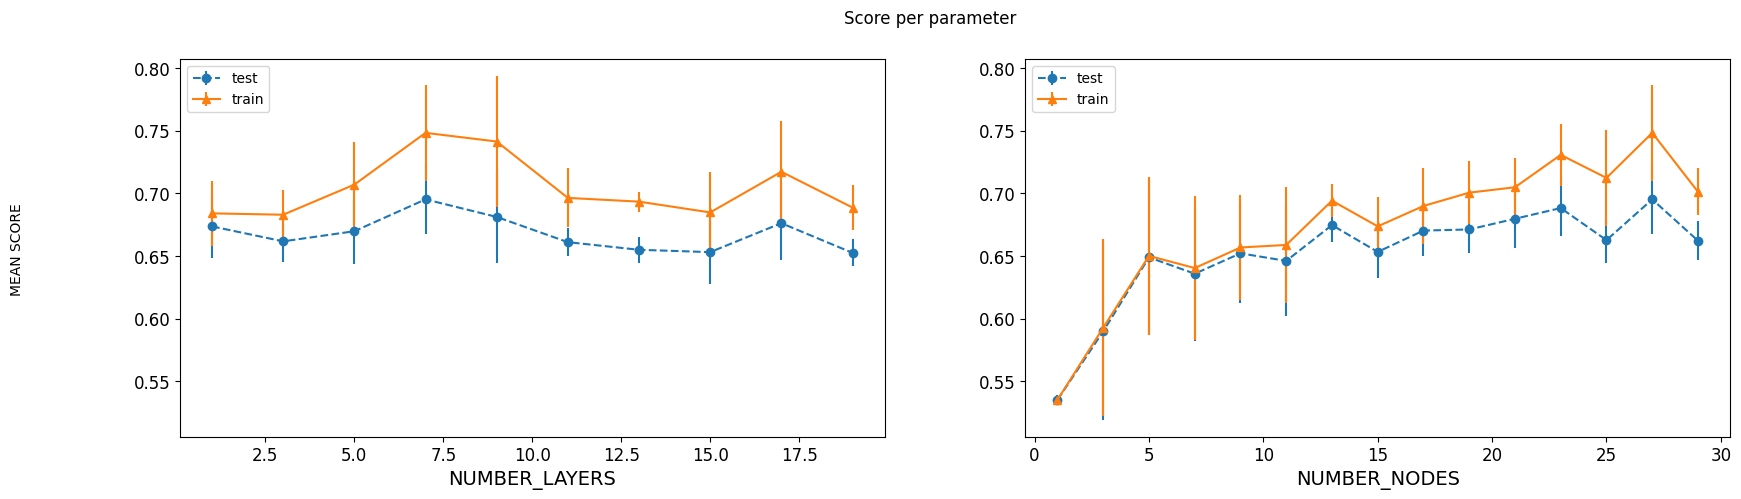

<Figure size 1200x800 with 0 Axes>

In [325]:
def plot_search_results(grid):
    """
    https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
        
    print(masks)
    print(masks_names)
    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
        ax[i].legend(loc="upper left")
        ax[i].yaxis.set_tick_params(labelbottom=True)


    plt.show()
    plt.tight_layout()
plot_search_results(gs)

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


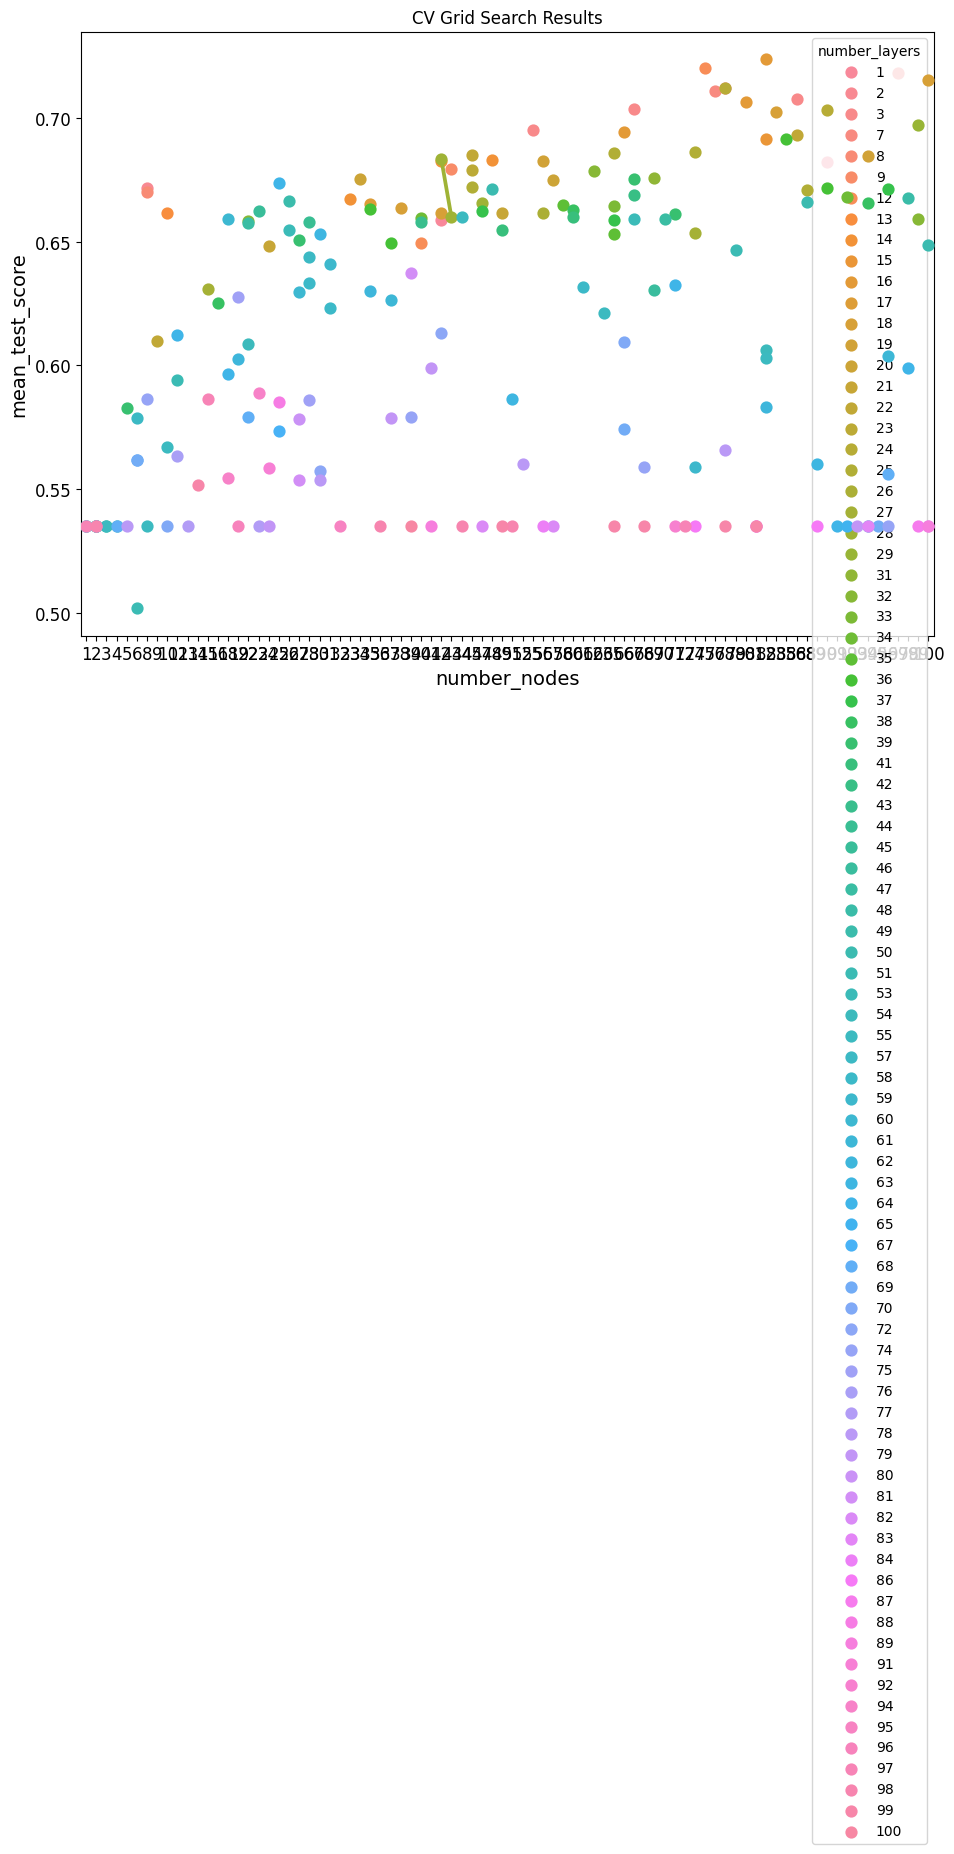

In [324]:
def plot_search_results(grid):
    """
    https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
        
    print(masks)
    print(masks_names)
    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
        ax[i].legend(loc="upper left")
        ax[i].yaxis.set_tick_params(labelbottom=True)


    plt.show()
    plt.tight_layout()

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    plt.show()

plot_cv_results(rgs.cv_results_, 'number_nodes', 'number_layers')


In [233]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

print(y_train.shape, y_test.shape)

(5197, 3) (1300, 3)


In [258]:
def fit_model_P(X_train, y_train, X_test, y_test, n_batch, n_epochs=1000):
    # define model
    clf = KerasClassifier(build_fn, optimizer="adam", epochs=n_epochs, batch_size=n_batch, number_nodes=100, number_layers=12)
    # fit model
    history = clf.fit(X_train, y_train,  validation_data=(X_test, y_test))
    return {"batch_size": n_batch, "history": history}

In [259]:
from multiprocessing.pool import ThreadPool
pool = ThreadPool(5)

batch_sizes = [4, 16, 32, 64, 256, 512]
n_epochs = 500

results = []
for batch in batch_sizes:
    results.append(pool.apply_async(fit_model_P, args=(X_train, y_train, X_test, y_test, batch, n_epochs)))

pool.close()
pool.join()


Epoch 1/500Epoch 1/500

Epoch 1/500
Epoch 1/500Epoch 1/500

21/21 [==============================] - 0s 14ms/step - loss: 0.8639 - precision: 0.5513 - recall: 0.5769 - auc: 0.7609 - accuracy: 0.7024 - val_loss: 0.8952 - val_precision: 0.5711 - val_recall: 0.4415 - val_auc: 0.7567 - val_accuracy: 0.7033
Epoch 3/500
21/21 [==============================] - 0s 15ms/step - loss: 0.8414 - precision: 0.5478 - recall: 0.6913 - auc: 0.7706 - accuracy: 0.7067 - val_loss: 0.9876 - val_precision: 0.5399 - val_recall: 0.6200 - val_auc: 0.7512 - val_accuracy: 0.6972
Epoch 5/500
21/21 [==============================] - 0s 16ms/step - loss: 0.8234 - precision: 0.5513 - recall: 0.7281 - auc: 0.7843 - accuracy: 0.7116 - val_loss: 1.0544 - val_precision: 0.5415 - val_recall: 0.6269 - val_auc: 0.7548 - val_accuracy: 0.6987
Epoch 3/500
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.8257 - precision: 0.5575 - recall: 0.7240 - auc: 0.7873 - accuracy: 0.7164 - val_loss: 1.0728 - v

21/21 [==============================] - 0s 16ms/step - loss: 0.6295 - precision: 0.5655 - recall: 0.8975 - auc: 0.8676 - accuracy: 0.7360 - val_loss: 1.7933 - val_precision: 0.4737 - val_recall: 0.7469 - val_auc: 0.7081 - val_accuracy: 0.6390
Epoch 33/500
82/82 [==============================] - 1s 16ms/step - loss: 0.7933 - precision: 0.4947 - recall: 0.8934 - auc: 0.7878 - accuracy: 0.6603 - val_loss: 0.9179 - val_precision: 0.4800 - val_recall: 0.8846 - val_auc: 0.7626 - val_accuracy: 0.6421
Epoch 11/500
21/21 [==============================] - 0s 21ms/step - loss: 0.6528 - precision: 0.5586 - recall: 0.8944 - auc: 0.8578 - accuracy: 0.7289 - val_loss: 1.9146 - val_precision: 0.4718 - val_recall: 0.7723 - val_auc: 0.7156 - val_accuracy: 0.6359
Epoch 34/500
21/21 [==============================] - 0s 16ms/step - loss: 0.6203 - precision: 0.5642 - recall: 0.8928 - auc: 0.8700 - accuracy: 0.7343 - val_loss: 2.3391 - val_precision: 0.4834 - val_recall: 0.7377 - val_auc: 0.7097 - val_ac

21/21 [==============================] - 0s 16ms/step - loss: 0.3877 - precision: 0.6383 - recall: 0.9488 - auc: 0.9353 - accuracy: 0.8037 - val_loss: 5.6279 - val_precision: 0.4760 - val_recall: 0.6946 - val_auc: 0.6917 - val_accuracy: 0.64330.8004 - accuracy:
Epoch 66/500
325/325 [==============================] - 5s 14ms/step - loss: 0.8321 - precision: 0.4960 - recall: 0.8252 - auc: 0.7421 - accuracy: 0.6622 - val_loss: 1.0285 - val_precision: 0.4565 - val_recall: 0.8554 - val_auc: 0.7101 - val_accuracy: 0.6123
Epoch 6/500
21/21 [==============================] - 0s 16ms/step - loss: 0.3813 - precision: 0.6442 - recall: 0.9512 - auc: 0.9385 - accuracy: 0.8086 - val_loss: 4.0057 - val_precision: 0.4657 - val_recall: 0.7685 - val_auc: 0.6980 - val_accuracy: 0.6290
Epoch 67/500
82/82 [==============================] - 1s 14ms/step - loss: 0.7622 - precision: 0.5012 - recall: 0.8825 - auc: 0.8042 - accuracy: 0.6681 - val_loss: 1.0868 - val_precision: 0.4841 - val_recall: 0.8654 - val_a

82/82 [==============================] - 1s 13ms/step - loss: 0.7055 - precision: 0.5091 - recall: 0.9142 - auc: 0.8140 - accuracy: 0.6776 - val_loss: 1.4290 - val_precision: 0.4765 - val_recall: 0.8031 - val_auc: 0.7186 - val_accuracy: 0.6403
Epoch 30/500
21/21 [==============================] - 0s 16ms/step - loss: 0.1920 - precision: 0.7347 - recall: 0.9760 - auc: 0.9796 - accuracy: 0.8744 - val_loss: 6.7540 - val_precision: 0.4803 - val_recall: 0.6862 - val_auc: 0.6965 - val_accuracy: 0.6479
Epoch 99/500
1300/1300 [==============================] - 18s 14ms/step - loss: 0.8997 - precision: 0.4769 - recall: 0.8215 - auc: 0.7461 - accuracy: 0.6401 - val_loss: 0.9406 - val_precision: 0.4821 - val_recall: 0.8400 - val_auc: 0.7537 - val_accuracy: 0.6459
Epoch 3/500
82/82 [==============================] - 1s 15ms/step - loss: 0.6816 - precision: 0.5177 - recall: 0.9044 - auc: 0.8170 - accuracy: 0.6873 - val_loss: 1.5716 - val_precision: 0.4787 - val_recall: 0.8192 - val_auc: 0.7264 - va

Epoch 40/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0821 - precision: 0.8519 - recall: 0.9918 - auc: 0.9954 - accuracy: 0.9398 - val_loss: 7.3683 - val_precision: 0.4917 - val_recall: 0.6569 - val_auc: 0.6887 - val_accuracy: 0.6592
Epoch 133/500
21/21 [==============================] - 0s 17ms/step - loss: 0.0617 - precision: 0.8789 - recall: 0.9961 - auc: 0.9974 - accuracy: 0.9529 - val_loss: 7.5609 - val_precision: 0.4974 - val_recall: 0.6708 - val_auc: 0.7002 - val_accuracy: 0.6644
Epoch 135/500
82/82 [==============================] - 1s 14ms/step - loss: 0.6313 - precision: 0.5280 - recall: 0.9172 - auc: 0.8587 - accuracy: 0.6990 - val_loss: 1.9453 - val_precision: 0.4607 - val_recall: 0.8062 - val_auc: 0.7162 - val_accuracy: 0.6208
Epoch 41/500
21/21 [==============================] - 0s 18ms/step - loss: 0.1014 - precision: 0.8416 - recall: 0.9919 - auc: 0.9941 - accuracy: 0.9350 - val_loss: 6.8757 - val_precision: 0.4823 - val_recall: 0.6931 - val_auc: 

1300/1300 [==============================] - 17s 13ms/step - loss: 0.8974 - precision: 0.4726 - recall: 0.8317 - auc: 0.7398 - accuracy: 0.6346 - val_loss: 0.8719 - val_precision: 0.5027 - val_recall: 0.7900 - val_auc: 0.7612 - val_accuracy: 0.6695
Epoch 4/500
21/21 [==============================] - 0s 17ms/step - loss: 0.0696 - precision: 0.8499 - recall: 0.9953 - auc: 0.9960 - accuracy: 0.9398 - val_loss: 7.8912 - val_precision: 0.4939 - val_recall: 0.6254 - val_auc: 0.6866 - val_accuracy: 0.6615
Epoch 152/500
82/82 [==============================] - 1s 14ms/step - loss: 0.5668 - precision: 0.5426 - recall: 0.9302 - auc: 0.8815 - accuracy: 0.7154 - val_loss: 2.1019 - val_precision: 0.4790 - val_recall: 0.8231 - val_auc: 0.7262 - val_accuracy: 0.6426c: 0.7530 - accur
Epoch 46/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0833 - precision: 0.8412 - recall: 0.9917 - auc: 0.9951 - accuracy: 0.9348 - val_loss: 7.4229 - val_precision: 0.4985 - val_recall: 0.6562 - va

155/163 [===========================>..] - ETA: 0s - loss: 0.6925 - precision: 0.5167 - recall: 0.9030 - auc: 0.8282 - accuracy: 0.6861Epoch 168/500Epoch 14/500

21/21 [==============================] - 0s 16ms/step - loss: 0.0328 - precision: 0.9148 - recall: 0.9989 - auc: 0.9991 - accuracy: 0.9686 - val_loss: 7.7758 - val_precision: 0.5040 - val_recall: 0.6346 - val_auc: 0.6986 - val_accuracy: 0.6700
Epoch 169/500
82/82 [==============================] - 1s 15ms/step - loss: 0.5187 - precision: 0.5460 - recall: 0.9392 - auc: 0.8799 - accuracy: 0.7193 - val_loss: 3.1832 - val_precision: 0.4628 - val_recall: 0.7985 - val_auc: 0.7027 - val_accuracy: 0.6238
Epoch 51/500
21/21 [==============================] - 0s 18ms/step - loss: 0.0587 - precision: 0.9150 - recall: 0.9953 - auc: 0.9976 - accuracy: 0.9676 - val_loss: 8.0943 - val_precision: 0.4955 - val_recall: 0.6292 - val_auc: 0.6861 - val_accuracy: 0.6628
Epoch 171/500
21/21 [==============================] - 0s 19ms/step - loss: 0.1

Epoch 201/500
163/163 [==============================] - 2s 13ms/step - loss: 0.6935 - precision: 0.5185 - recall: 0.8926 - auc: 0.8094 - accuracy: 0.6879 - val_loss: 2.4560 - val_precision: 0.4758 - val_recall: 0.8085 - val_auc: 0.7242 - val_accuracy: 0.6392
Epoch 32/500
1300/1300 [==============================] - 18s 14ms/step - loss: 0.8824 - precision: 0.4860 - recall: 0.8058 - auc: 0.7558 - accuracy: 0.6511 - val_loss: 0.9113 - val_precision: 0.4623 - val_recall: 0.8685 - val_auc: 0.7453 - val_accuracy: 0.61953 - accuracy: 0.680
Epoch 5/500
21/21 [==============================] - 0s 15ms/step - loss: 0.0592 - precision: 0.8870 - recall: 0.9959 - auc: 0.9976 - accuracy: 0.9563 - val_loss: 7.0175 - val_precision: 0.4947 - val_recall: 0.6446 - val_auc: 0.6987 - val_accuracy: 0.6621s: 0.7795 - precision: 0.5124 - recall: 0.8380 - auc: 0.7623 - accuracy: 0.68
Epoch 202/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0540 - precision: 0.8825 - recall: 0.9952 - auc:

21/21 [==============================] - 0s 15ms/step - loss: 0.0336 - precision: 0.9188 - recall: 0.9971 - auc: 0.9992 - accuracy: 0.9697 - val_loss: 8.0189 - val_precision: 0.4908 - val_recall: 0.6331 - val_auc: 0.6868 - val_accuracy: 0.6587
Epoch 234/500
163/163 [==============================] - 2s 14ms/step - loss: 0.6710 - precision: 0.5232 - recall: 0.9074 - auc: 0.8289 - accuracy: 0.6934 - val_loss: 2.9613 - val_precision: 0.4784 - val_recall: 0.8023 - val_auc: 0.7063 - val_accuracy: 0.6426
Epoch 37/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0725 - precision: 0.8753 - recall: 0.9933 - auc: 0.9971 - accuracy: 0.9506 - val_loss: 7.1063 - val_precision: 0.4904 - val_recall: 0.6462 - val_auc: 0.6912 - val_accuracy: 0.6582 0.77
Epoch 236/500
1086/1300 [========================>.....] - ETA: 2s - loss: 0.8603 - precision: 0.4831 - recall: 0.8357 - auc: 0.7607 - accuracy: 0.6472Epoch 237/500
Epoch 71/500
21/21 [==============================] - 0s 15ms/step - 

21/21 [==============================] - 0s 15ms/step - loss: 0.0730 - precision: 0.8727 - recall: 0.9944 - auc: 0.9966 - accuracy: 0.9498 - val_loss: 5.8600 - val_precision: 0.4965 - val_recall: 0.6600 - val_auc: 0.7001 - val_accuracy: 0.6636
Epoch 79/500
Epoch 265/500
21/21 [==============================] - 0s 17ms/step - loss: 0.0478 - precision: 0.9012 - recall: 0.9964 - auc: 0.9982 - accuracy: 0.9624 - val_loss: 5.9891 - val_precision: 0.5024 - val_recall: 0.6538 - val_auc: 0.7106 - val_accuracy: 0.6687.9658 - accura
Epoch 266/500 390/1300 [========>.....................]
163/163 [==============================] - 2s 14ms/step - loss: 0.6188 - precision: 0.5366 - recall: 0.9035 - auc: 0.8363 - accuracy: 0.7076 - val_loss: 3.1262 - val_precision: 0.4796 - val_recall: 0.7692 - val_auc: 0.7123 - val_accuracy: 0.6449
Epoch 42/500
 - ETA: 0s - loss: 0.0332 - precision: 0.9259 - recall: 0.9987 - auc: 0.9993 - accuracy: 0.972982/82 [==============================] - 1s 14ms/step - loss:

21/21 [==============================] - 0s 15ms/step - loss: 0.0678 - precision: 0.8630 - recall: 0.9935 - auc: 0.9970 - accuracy: 0.9452 - val_loss: 5.7328 - val_precision: 0.4945 - val_recall: 0.6592 - val_auc: 0.7029 - val_accuracy: 0.66180.9632 - accuracy:  - ETA: 0s - loss: 0.0593 - precision: 0.8574 - recall: 0.9947 - auc: 0.9973 - 
Epoch 281/500
163/163 [==============================] - 2s 15ms/step - loss: 0.6203 - precision: 0.5405 - recall: 0.8949 - auc: 0.8411 - accuracy: 0.7113 - val_loss: 4.1266 - val_precision: 0.4727 - val_recall: 0.7738 - val_auc: 0.6923 - val_accuracy: 0.6369
Epoch 44/500
82/82 [==============================] - 1s 14ms/step - loss: 0.2863 - precision: 0.6980 - recall: 0.9680 - auc: 0.9636 - accuracy: 0.8494 - val_loss: 5.0013 - val_precision: 0.4728 - val_recall: 0.6608 - val_auc: 0.6962 - val_accuracy: 0.6413
Epoch 84/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0533 - precision: 0.9014 - recall: 0.9960 - auc: 0.9984 - accura

21/21 [==============================] - 0s 16ms/step - loss: 0.0483 - precision: 0.9032 - recall: 0.9966 - auc: 0.9985 - accuracy: 0.9633 - val_loss: 6.3259 - val_precision: 0.4801 - val_recall: 0.6231 - val_auc: 0.6866 - val_accuracy: 0.6495- precision: 0.5481 - recall: 0.8895 - auc: 0.7953 - accura
Epoch 314/500
21/21 [==============================] - 0s 18ms/step - loss: 0.0512 - precision: 0.9236 - recall: 0.9949 - auc: 0.9985 - accuracy: 0.9708 - val_loss: 5.8787 - val_precision: 0.4916 - val_recall: 0.6515 - val_auc: 0.7001 - val_accuracy: 0.6592
Epoch 318/500
82/82 [==============================] - 1s 15ms/step - loss: 0.2625 - precision: 0.7486 - recall: 0.9592 - auc: 0.9726 - accuracy: 0.8789 - val_loss: 4.8024 - val_precision: 0.4912 - val_recall: 0.6208 - val_auc: 0.7072 - val_accuracy: 0.6592auc: 0.8650 - acc
Epoch 95/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0663 - precision: 0.8513 - recall: 0.9947 - auc: 0.9974 - accuracy: 0.9402 - val_loss: 

82/82 [==============================] - 1s 16ms/step - loss: 0.1892 - precision: 0.8110 - recall: 0.9719 - auc: 0.9864 - accuracy: 0.9150 - val_loss: 4.4573 - val_precision: 0.4844 - val_recall: 0.6208 - val_auc: 0.6915 - val_accuracy: 0.6533
Epoch 103/500
21/21 [==============================] - 0s 14ms/step - loss: 0.0497 - precision: 0.9043 - recall: 0.9958 - auc: 0.9985 - accuracy: 0.9634 - val_loss: 5.9094 - val_precision: 0.4925 - val_recall: 0.6608 - val_auc: 0.6989 - val_accuracy: 0.6600
Epoch 347/500
21/21 [==============================] - 0s 14ms/step - loss: 0.0234 - precision: 0.9393 - recall: 0.9982 - auc: 0.9996 - accuracy: 0.9779 - val_loss: 6.3694 - val_precision: 0.4955 - val_recall: 0.6315 - val_auc: 0.7009 - val_accuracy: 0.6628
Epoch 348/500
163/163 [==============================] - 2s 15ms/step - loss: 0.5155 - precision: 0.5543 - recall: 0.9200 - auc: 0.8734 - accuracy: 0.7267 - val_loss: 6.3406 - val_precision: 0.4781 - val_recall: 0.7546 - val_auc: 0.7016 - v

21/21 [==============================] - 0s 20ms/step - loss: 0.0201 - precision: 0.9165 - recall: 0.9978 - auc: 0.9995 - accuracy: 0.9689 - val_loss: 7.3378 - val_precision: 0.5039 - val_recall: 0.6023 - val_auc: 0.6903 - val_accuracy: 0.6697c: 0.7624 - accuracy: 0.643 - ETA: 6s - loss: 0.8534 - precision: 0.4807 - recall: 0.8589 - auc: 0.7625 - accuracy: 0.6435147/325 [============>.............
Epoch 380/500
163/163 [==============================] - 2s 15ms/step - loss: 0.4852 - precision: 0.5670 - recall: 0.9249 - auc: 0.8917 - accuracy: 0.7396 - val_loss: 4.4689 - val_precision: 0.4703 - val_recall: 0.7800 - val_auc: 0.7026 - val_accuracy: 0.6338
Epoch 59/500
82/82 [==============================] - 1s 16ms/step - loss: 0.1461 - precision: 0.8056 - recall: 0.9876 - auc: 0.9900 - accuracy: 0.9164 - val_loss: 4.2202 - val_precision: 0.4914 - val_recall: 0.6369 - val_auc: 0.7056 - val_accuracy: 0.6592
Epoch 113/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0861

Epoch 395/500
21/21 [==============================] - 0s 17ms/step - loss: 0.0326 - precision: 0.9423 - recall: 0.9979 - auc: 0.9993 - accuracy: 0.9789 - val_loss: 6.3005 - val_precision: 0.4797 - val_recall: 0.6085 - val_auc: 0.6830 - val_accuracy: 0.6495
Epoch 397/500
1270/1300 [============================>.] - ETA: 0s - loss: 0.8489 - precision: 0.4834 - recall: 0.8569 - auc: 0.7669 - accuracy: 0.646910/21 [=============>................] - ETA: 0s - loss: 0.0283 - precision: 0.9581 - recall: 0.9989 - auc: 0.9996 - accura1258/1300 [============================>.] - ETA: 0s - loss: 0.8490 - precision: 0.4833 - recall: 0.8569 - auc: 0.7668 - accuracy:21/21 [==============================] - 0s 17ms/step - loss: 0.0253 - precision: 0.9592 - recall: 0.9988 - auc: 0.9997 - accuracy: 0.9855 - val_loss: 7.1098 - val_precision: 0.4954 - val_recall: 0.6146 - val_auc: 0.6885 - val_accuracy: 0.6628
Epoch 398/500
21/21 [==============================] - 0s 15ms/step - loss: 0.0164 - precision

21/21 [==============================] - 0s 16ms/step - loss: 0.0306 - precision: 0.9504 - recall: 0.9969 - auc: 0.9993 - accuracy: 0.9816 - val_loss: 6.1867 - val_precision: 0.4889 - val_recall: 0.6085 - val_auc: 0.6958 - val_accuracy: 0.6574
Epoch 427/500
21/21 [==============================] - 0s 17ms/step - loss: 0.0439 - precision: 0.9312 - recall: 0.9958 - auc: 0.9988 - accuracy: 0.9741 - val_loss: 5.8997 - val_precision: 0.4913 - val_recall: 0.6092 - val_auc: 0.6982 - val_accuracy: 0.6595
Epoch 428/500
82/82 [==============================] - 1s 15ms/step - loss: 0.1229 - precision: 0.8668 - recall: 0.9842 - auc: 0.9941 - accuracy: 0.9443 - val_loss: 5.2204 - val_precision: 0.5023 - val_recall: 0.5908 - val_auc: 0.6921 - val_accuracy: 0.6685
Epoch 127/500
21/21 [==============================] - 0s 19ms/step - loss: 0.0499 - precision: 0.9028 - recall: 0.9956 - auc: 0.9983 - accuracy: 0.9628 - val_loss: 6.2711 - val_precision: 0.4997 - val_recall: 0.6162 - val_auc: 0.6967 - val

21/21 [==============================] - 0s 17ms/step - loss: 0.0248 - precision: 0.9453 - recall: 0.9987 - auc: 0.9997 - accuracy: 0.9803 - val_loss: 6.6448 - val_precision: 0.4927 - val_recall: 0.5992 - val_auc: 0.6909 - val_accuracy: 0.6608
Epoch 460/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0320 - precision: 0.9560 - recall: 0.9965 - auc: 0.9994 - accuracy: 0.9835 - val_loss: 5.8465 - val_precision: 0.4862 - val_recall: 0.6246 - val_auc: 0.6939 - val_accuracy: 0.6549
Epoch 462/500
21/21 [==============================] - 0s 15ms/step - loss: 0.0281 - precision: 0.9488 - recall: 0.9983 - auc: 0.9995 - accuracy: 0.9815 - val_loss: 5.9409 - val_precision: 0.4991 - val_recall: 0.6223 - val_auc: 0.7031 - val_accuracy: 0.6659
Epoch 463/500
21/21 [==============================] - 0s 16ms/step - loss: 0.0228 - precision: 0.9569 - recall: 0.9988 - auc: 0.9997 - accuracy: 0.9846 - val_loss: 6.4984 - val_precision: 0.4937 - val_recall: 0.6015 - val_auc: 0.6868 - val

Epoch 141/500
325/325 [==============================] - 5s 14ms/step - loss: 0.6316 - precision: 0.5507 - recall: 0.8934 - auc: 0.7975 - accuracy: 0.7214 - val_loss: 6.7200 - val_precision: 0.4531 - val_recall: 0.6354 - val_auc: 0.6241 - val_accuracy: 0.6228
Epoch 38/500 550/1300 [===========>..................] - ETA: 8s - loss: 0.7817 - precision: 0.5014 - recall: 0.8870 - auc: 0.7946 - accuracy: 0.6683
21/21 [==============================] - 0s 15ms/step - loss: 0.0440 - precision: 0.9380 - recall: 0.9968 - auc: 0.9990 - accuracy: 0.9770 - val_loss: 5.6999 - val_precision: 0.4843 - val_recall: 0.6523 - val_auc: 0.6939 - val_accuracy: 0.6526
Epoch 477/500
21/21 [==============================] - 0s 19ms/step - loss: 0.0389 - precision: 0.9177 - recall: 0.9977 - auc: 0.9992 - accuracy: 0.9694 - val_loss: 5.8749 - val_precision: 0.4920 - val_recall: 0.6377 - val_auc: 0.7019 - val_accuracy: 0.65970.9947 - accuracy: 0.9 - ETA: 0s - loss: 0.1016 - precision: 0.8747 - recall: 0.9898 - au

11/11 [==============================] - 0s 20ms/step - loss: 0.8089 - precision: 0.4869 - recall: 0.8946 - auc: 0.7773 - accuracy: 0.6506 - val_loss: 0.9606 - val_precision: 0.4685 - val_recall: 0.8477 - val_auc: 0.7350 - val_accuracy: 0.6287
Epoch 9/500
11/11 [==============================] - 0s 18ms/step - loss: 0.8260 - precision: 0.4813 - recall: 0.8786 - auc: 0.7662 - accuracy: 0.6439 - val_loss: 0.9691 - val_precision: 0.4594 - val_recall: 0.8708 - val_auc: 0.7328 - val_accuracy: 0.6154.9600 - accuracy: 0.8672 25/325 [=>............................]
 - ETA: 3s - loss: 0.5724 - precision: 0.5531 - recall: 0.8791 - auc: 0.8048 - accuracy: 0.7228Epoch 10/500
11/11 [==============================] - 0s 16ms/step - loss: 0.8453 - precision: 0.4713 - recall: 0.8885 - auc: 0.7547 - accuracy: 0.6306 - val_loss: 0.8941 - val_precision: 0.4912 - val_recall: 0.8623 - val_auc: 0.7448 - val_accuracy: 0.6564
Epoch 11/500
82/82 [==============================] - 1s 14ms/step - loss: 0.1002 - 

11/11 [==============================] - 0s 17ms/step - loss: 0.6317 - precision: 0.5197 - recall: 0.9214 - auc: 0.8455 - accuracy: 0.6899 - val_loss: 2.8379 - val_precision: 0.4618 - val_recall: 0.7862 - val_auc: 0.6967 - val_accuracy: 0.6233
Epoch 50/500
11/11 [==============================] - 0s 16ms/step - loss: 0.6170 - precision: 0.5225 - recall: 0.9226 - auc: 0.8484 - accuracy: 0.6931 - val_loss: 3.0339 - val_precision: 0.4484 - val_recall: 0.8192 - val_auc: 0.6878 - val_accuracy: 0.6038
Epoch 51/500
82/82 [==============================] - 1s 13ms/step - loss: 0.1100 - precision: 0.8580 - recall: 0.9892 - auc: 0.9934 - accuracy: 0.9418 - val_loss: 4.3708 - val_precision: 0.4956 - val_recall: 0.6015 - val_auc: 0.6946 - val_accuracy: 0.6631
Epoch 52/500
Epoch 160/500
325/325 [==============================] - 4s 13ms/step - loss: 0.6048 - precision: 0.5613 - recall: 0.8998 - auc: 0.8080 - accuracy: 0.7322 - val_loss: 10.9335 - val_precision: 0.4484 - val_recall: 0.5615 - val_auc

Epoch 68/500
11/11 [==============================] - 0s 17ms/step - loss: 0.5081 - precision: 0.5606 - recall: 0.9416 - auc: 0.8976 - accuracy: 0.7345 - val_loss: 4.3371 - val_precision: 0.4687 - val_recall: 0.7492 - val_auc: 0.6875 - val_accuracy: 0.6333
Epoch 69/500
163/163 [==============================] - 2s 14ms/step - loss: 0.3051 - precision: 0.7589 - recall: 0.9447 - auc: 0.9681 - accuracy: 0.8814 - val_loss: 5.6391 - val_precision: 0.5066 - val_recall: 0.6454 - val_auc: 0.7165 - val_accuracy: 0.6723
Epoch 85/500
11/11 [==============================] - 0s 15ms/step - loss: 0.5115 - precision: 0.5650 - recall: 0.9340 - auc: 0.8949 - accuracy: 0.7382 - val_loss: 4.5774 - val_precision: 0.4695 - val_recall: 0.7115 - val_auc: 0.6902 - val_accuracy: 0.6359
Epoch 71/500
11/11 [==============================] - 0s 16ms/step - loss: 0.5182 - precision: 0.5684 - recall: 0.9408 - auc: 0.8947 - accuracy: 0.7421 - val_loss: 4.4313 - val_precision: 0.4636 - val_recall: 0.7100 - val_auc: 

Epoch 87/500
11/11 [==============================] - 0s 21ms/step - loss: 0.4178 - precision: 0.5776 - recall: 0.9510 - auc: 0.9137 - accuracy: 0.7518 - val_loss: 4.1131 - val_precision: 0.4657 - val_recall: 0.7792 - val_auc: 0.7042 - val_accuracy: 0.6285c: 0.8202 - 124/163 [=====================>........ - ETA: 0s - loss: 0.3196 - precision: 0.7537 - recall: 0.9411 - auc: 0.9659 - accuracy: 0.8777
Epoch 88/500
11/11 [==============================].] - ETA: 0s - loss: 0.3210 - precision: 0.7535 - recall: 0.9410 - auc: 0.9657 - accuracy: 0.8776 - 0s 18ms/step - loss: 0.4272 - precision: 0.5972 - recall: 0.9523 - auc: 0.9180 - accuracy: 0.7699 - val_loss: 4.3825 - val_precision: 0.4688 - val_recall: 0.7800 - val_auc: 0.7036 - val_accuracy: 0.6321
Epoch 90/500
11/11 [==============================] - 0s 25ms/step - loss: 0.4187 - precision: 0.5720 - recall: 0.9491 - auc: 0.9118 - accuracy: 0.7463 - val_loss: 4.7046 - val_precision: 0.4827 - val_recall: 0.7515 - val_auc: 0.7105 - val_acc

11/11 [==============================] - 0s 18ms/step - loss: 0.2503 - precision: 0.6515 - recall: 0.9767 - auc: 0.9561 - accuracy: 0.8180 - val_loss: 6.4677 - val_precision: 0.4764 - val_recall: 0.7069 - val_auc: 0.6961 - val_accuracy: 0.6433
Epoch 126/500
82/82 [==============================] - 1s 15ms/step - loss: 0.0815 - precision: 0.8881 - recall: 0.9942 - auc: 0.9970 - accuracy: 0.9563 - val_loss: 6.4243 - val_precision: 0.4763 - val_recall: 0.5731 - val_auc: 0.6670 - val_accuracy: 0.6477
Epoch 173/500
11/11 [==============================] - 0s 17ms/step - loss: 0.2079 - precision: 0.6608 - recall: 0.9782 - auc: 0.9637 - accuracy: 0.8254 - val_loss: 7.4745 - val_precision: 0.4607 - val_recall: 0.6985 - val_auc: 0.6801 - val_accuracy: 0.6269uc: 0.9625 - accuracy: 0. - ETA: 1s - loss: 0.5560 - precision: 0.5618 - recall: 0.9216 - auc: 0.8277 - accuracy:
Epoch 128/500
11/11 [==============================] - 0s 19ms/step - loss: 0.2253 - precision: 0.6572 - recall: 0.9790 - auc: 

11/11 [==============================] - 0s 18ms/step - loss: 0.1095 - precision: 0.6911 - recall: 0.9950 - auc: 0.9832 - accuracy: 0.8500 - val_loss: 9.3056 - val_precision: 0.4758 - val_recall: 0.7031 - val_auc: 0.6860 - val_accuracy: 0.64280.9831 - accuracy: 0.
Epoch 164/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0794 - precision: 0.6897 - recall: 0.9980 - auc: 0.9879 - accuracy: 0.8495 - val_loss: 9.9894 - val_precision: 0.4789 - val_recall: 0.6992 - val_auc: 0.6870 - val_accuracy: 0.6462
Epoch 165/500
11/11 [==============================] - 0s 17ms/step - loss: 0.1092 - precision: 0.7038 - recall: 0.9949 - auc: 0.9836 - accuracy: 0.8588 - val_loss: 9.8467 - val_precision: 0.4741 - val_recall: 0.6769 - val_auc: 0.6831 - val_accuracy: 0.6421
 - ETA: 2s - loss: 0.5235 - precision: 0.5785 - recall: 0.9146 - auc: 0.8370 - accuracy: 0.749478/82 [===========================>..] - ETA: 0s - loss: 0.1304 - precision: 0.8688 - recall: 0.9869 - auc: 0.9932 - accurac

Epoch 182/500
11/11 [==============================] - 0s 19ms/step - loss: 0.1267 - precision: 0.6897 - recall: 0.9931 - auc: 0.9804 - accuracy: 0.8487 - val_loss: 8.0335 - val_precision: 0.4842 - val_recall: 0.7423 - val_auc: 0.7013 - val_accuracy: 0.6505ecision: 0.9275 - recall: 0.9957 - auc: 0.9983 - acc
Epoch 183/500
11/11 [==============================] - 0s 16ms/step - loss: 0.1462 - precision: 0.6798 - recall: 0.9909 - auc: 0.9793 - accuracy: 0.8414 - val_loss: 8.3008 - val_precision: 0.4766 - val_recall: 0.7138 - val_auc: 0.6878 - val_accuracy: 0.6433
Epoch 184/500
82/82 [==============================] - 1s 14ms/step - loss: 0.0671 - precision: 0.9223 - recall: 0.9947 - auc: 0.9979 - accuracy: 0.9702 - val_loss: 4.0252 - val_precision: 0.4953 - val_recall: 0.6054 - val_auc: 0.6931 - val_accuracy: 0.6628
Epoch 183/500
11/11 [==============================] - 0s 19ms/step - loss: 0.1392 - precision: 0.6883 - recall: 0.9931 - auc: 0.9801 - accuracy: 0.8478 - val_loss: 8.1858 - 

Epoch 203/500
325/325 [==============================] - 5s 14ms/step - loss: 0.5309 - precision: 0.5716 - recall: 0.9134 - auc: 0.8289 - accuracy: 0.7426 - val_loss: 10.4658 - val_precision: 0.4556 - val_recall: 0.6123 - val_auc: 0.6269 - val_accuracy: 0.6269
Epoch 50/500
163/163 [==============================] - 2s 14ms/step - loss: 0.2583 - precision: 0.8047 - recall: 0.9520 - auc: 0.9777 - accuracy: 0.9068 - val_loss: 6.9491 - val_precision: 0.5009 - val_recall: 0.6123 - val_auc: 0.6926 - val_accuracy: 0.6674
Epoch 97/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0907 - precision: 0.7231 - recall: 0.9963 - auc: 0.9887 - accuracy: 0.8715 - val_loss: 7.9593 - val_precision: 0.4757 - val_recall: 0.7300 - val_auc: 0.6940 - val_accuracy: 0.6418
Epoch 205/500
11/11 [==============================] - 0s 17ms/step - loss: 0.0790 - precision: 0.7191 - recall: 0.9965 - auc: 0.9898 - accuracy: 0.8691 - val_loss: 8.1731 - val_precision: 0.4733 - val_recall: 0.7300 - val_

Epoch 245/500
11/11 [==============================] - 0s 16ms/step - loss: 0.0218 - precision: 0.8106 - recall: 0.9995 - auc: 0.9978 - accuracy: 0.9220 - val_loss: 9.7539 - val_precision: 0.4732 - val_recall: 0.6792 - val_auc: 0.6848 - val_accuracy: 0.64109982 - accuracy
Epoch 246/500
325/325 [==============================] - 5s 14ms/step - loss: 0.5096 - precision: 0.5836 - recall: 0.9168 - auc: 0.8368 - accuracy: 0.7541 - val_loss: 4.1299 - val_precision: 0.4617 - val_recall: 0.6446 - val_auc: 0.6415 - val_accuracy: 0.6310
Epoch 52/500
11/11 [==============================] - 0s 16ms/step - loss: 0.0263 - precision: 0.8085 - recall: 0.9998 - auc: 0.9974 - accuracy: 0.9210 - val_loss: 9.7708 - val_precision: 0.4785 - val_recall: 0.6662 - val_auc: 0.6860 - val_accuracy: 0.6467
Epoch 248/500
82/82 [==============================] - 1s 12ms/step - loss: 0.1386 - precision: 0.8762 - recall: 0.9765 - auc: 0.9923 - accuracy: 0.9460 - val_loss: 4.0401 - val_precision: 0.4936 - val_recall: 

11/11 [==============================] - 0s 26ms/step - loss: 0.0410 - precision: 0.7722 - recall: 0.9986 - auc: 0.9957 - accuracy: 0.9013 - val_loss: 8.4916 - val_precision: 0.4779 - val_recall: 0.6808 - val_auc: 0.6867 - val_accuracy: 0.6456
Epoch 284/500
11/11 [==============================] - 0s 19ms/step - loss: 0.0358 - precision: 0.8048 - recall: 0.9989 - auc: 0.9967 - accuracy: 0.9188 - val_loss: 9.0589 - val_precision: 0.4801 - val_recall: 0.6785 - val_auc: 0.6900 - val_accuracy: 0.6479
Epoch 285/500
11/11 [==============================] - 0s 18ms/step - loss: 0.1118 - precision: 0.7773 - recall: 0.9935 - auc: 0.9901 - accuracy: 0.9029 - val_loss: 7.4156 - val_precision: 0.4754 - val_recall: 0.6923 - val_auc: 0.6916 - val_accuracy: 0.6428loss: 0.2477 - precision: 0.7740 - recall: 0.9515 - auc: 0.9765 - accura
Epoch 286/500
11/11 [==============================] - 0s 19ms/step - loss: 0.0886 - precision: 0.7697 - recall: 0.9970 - auc: 0.9921 - accuracy: 0.8995 - val_loss: 6.2

11/11 [==============================] - 0s 18ms/step - loss: 0.0320 - precision: 0.8137 - recall: 0.9997 - auc: 0.9978 - accuracy: 0.9235 - val_loss: 8.4998 - val_precision: 0.4790 - val_recall: 0.6677 - val_auc: 0.6894 - val_accuracy: 0.6472
Epoch 308/500
11/11 [==============================] - 0s 19ms/step - loss: 0.0445 - precision: 0.8135 - recall: 0.9983 - auc: 0.9967 - accuracy: 0.9231 - val_loss: 8.4471 - val_precision: 0.4796 - val_recall: 0.6792 - val_auc: 0.6942 - val_accuracy: 0.64749977 - accurac
Epoch 309/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0410 - precision: 0.8038 - recall: 0.9980 - auc: 0.9972 - accuracy: 0.9181 - val_loss: 7.7773 - val_precision: 0.4839 - val_recall: 0.7031 - val_auc: 0.6953 - val_accuracy: 0.65109972 - accurac
Epoch 310/500
82/82 [==============================] - 1s 14ms/step - loss: 0.0714 - precision: 0.9244 - recall: 0.9921 - auc: 0.9978 - accuracy: 0.9703 - val_loss: 4.3586 - val_precision: 0.4981 - val_recall: 0.

Epoch 110/500
11/11 [==============================] - 0s 17ms/step - loss: 0.0539 - precision: 0.8149 - recall: 0.9974 - auc: 0.9968 - accuracy: 0.9235 - val_loss: 6.7637 - val_precision: 0.4683 - val_recall: 0.6762 - val_auc: 0.6896 - val_accuracy: 0.6362
Epoch 348/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0911 - precision: 0.7836 - recall: 0.9941 - auc: 0.9940 - accuracy: 0.9064 - val_loss: 5.9620 - val_precision: 0.4688 - val_recall: 0.7046 - val_auc: 0.6880 - val_accuracy: 0.6354
Epoch 349/500
82/82 [==============================] - 1s 14ms/step - loss: 0.0652 - precision: 0.9425 - recall: 0.9924 - auc: 0.9980 - accuracy: 0.9773 - val_loss: 4.5736 - val_precision: 0.4977 - val_recall: 0.5846 - val_auc: 0.6968 - val_accuracy: 0.6649
Epoch 212/500
11/11 [==============================] - 0s 17ms/step - loss: 0.0879 - precision: 0.7747 - recall: 0.9947 - auc: 0.9933 - accuracy: 0.9018 - val_loss: 5.8559 - val_precision: 0.4781 - val_recall: 0.6869 - val_auc

Epoch 386/500
11/11 [==============================] - 0s 19ms/step - loss: 0.0171 - precision: 0.8719 - recall: 0.9998 - auc: 0.9993 - accuracy: 0.9510 - val_loss: 7.9936 - val_precision: 0.4763 - val_recall: 0.6500 - val_auc: 0.6869 - val_accuracy: 0.6451ss: 0.7978 - precision: 0.5062 - recall: 0.8616 - auc: 0.7933 - accur
Epoch 387/500
11/11 [==============================] - 0s 18ms/step - loss: 0.0093 - precision: 0.8757 - recall: 1.0000 - auc: 0.9995 - accuracy: 0.9527 - val_loss: 8.7537 - val_precision: 0.4749 - val_recall: 0.6331 - val_auc: 0.6795 - val_accuracy: 0.6444.9981 - accur
Epoch 388/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0112 - precision: 0.8877 - recall: 0.9999 - auc: 0.9994 - accuracy: 0.9578 - val_loss: 8.7273 - val_precision: 0.4744 - val_recall: 0.6277 - val_auc: 0.6791 - val_accuracy: 0.6441
Epoch 389/500
11/11 [==============================] - 0s 18ms/step - loss: 0.0152 - precision: 0.8901 - recall: 0.9996 - auc: 0.9996 - accuracy

11/11 [==============================] - 0s 21ms/step - loss: 0.0582 - precision: 0.8031 - recall: 0.9983 - auc: 0.9969 - accuracy: 0.9178 - val_loss: 5.8102 - val_precision: 0.4775 - val_recall: 0.7023 - val_auc: 0.6994 - val_accuracy: 0.6446
Epoch 429/500
11/11 [==============================] - 0s 25ms/step - loss: 0.0423 - precision: 0.8020 - recall: 0.9982 - auc: 0.9976 - accuracy: 0.9173 - val_loss: 6.5113 - val_precision: 0.4787 - val_recall: 0.7008 - val_auc: 0.7048 - val_accuracy: 0.6459
Epoch 430/500
11/11 [==============================] - 0s 21ms/step - loss: 0.0177 - precision: 0.8292 - recall: 0.9996 - auc: 0.9993 - accuracy: 0.9312 - val_loss: 7.3621 - val_precision: 0.4768 - val_recall: 0.6638 - val_auc: 0.6899 - val_accuracy: 0.6451
Epoch 431/500
11/11 [==============================] - 0s 26ms/step - loss: 0.0140 - precision: 0.8556 - recall: 0.9999 - auc: 0.9994 - accuracy: 0.9437 - val_loss: 7.4453 - val_precision: 0.4695 - val_recall: 0.6638 - val_auc: 0.6893 - val

Epoch 449/500
11/11 [==============================] - 0s 22ms/step - loss: 0.0676 - precision: 0.8154 - recall: 0.9962 - auc: 0.9959 - accuracy: 0.9235 - val_loss: 6.9967 - val_precision: 0.4691 - val_recall: 0.6592 - val_auc: 0.6917 - val_accuracy: 0.6377
Epoch 450/500
11/11 [==============================] - 0s 18ms/step - loss: 0.0546 - precision: 0.7908 - recall: 0.9976 - auc: 0.9970 - accuracy: 0.9112 - val_loss: 5.3390 - val_precision: 0.4726 - val_recall: 0.7108 - val_auc: 0.6998 - val_accuracy: 0.6392 0.9968 - accuracy: 0.965
Epoch 452/500
11/11 [==============================] - 0s 17ms/step - loss: 0.1138 - precision: 0.7941 - recall: 0.9926 - auc: 0.9927 - accuracy: 0.9114 - val_loss: 5.6095 - val_precision: 0.4622 - val_recall: 0.6915 - val_auc: 0.6883 - val_accuracy: 0.6290
Epoch 454/500
82/82 [==============================] - 1s 16ms/step - loss: 0.0903 - precision: 0.9152 - recall: 0.9876 - auc: 0.9965 - accuracy: 0.9653 - val_loss: 5.1340 - val_precision: 0.4967 - val

11/11 [==============================] - 0s 17ms/step - loss: 0.0291 - precision: 0.8208 - recall: 0.9996 - auc: 0.9986 - accuracy: 0.9271 - val_loss: 7.6433 - val_precision: 0.4753 - val_recall: 0.6654 - val_auc: 0.6900 - val_accuracy: 0.6436: 0.8750 - accuracy: 0.
Epoch 470/500
163/163 [==============================] - 2s 14ms/step - loss: 0.1894 - precision: 0.8437 - recall: 0.9710 - auc: 0.9874 - accuracy: 0.9303 - val_loss: 4.5453 - val_precision: 0.5068 - val_recall: 0.6323 - val_auc: 0.7132 - val_accuracy: 0.6723
Epoch 121/500
11/11 [==============================] - 0s 18ms/step - loss: 0.0187 - precision: 0.8613 - recall: 0.9999 - auc: 0.9990 - accuracy: 0.9463 - val_loss: 7.2995 - val_precision: 0.4754 - val_recall: 0.6831 - val_auc: 0.6972 - val_accuracy: 0.6431
Epoch 472/500
15/82 [====>.........................]11/11 [==============================] - 0s 19ms/step - loss: 0.0227 - precision: 0.8597 - recall: 0.9989 - auc: 0.9988 - accuracy: 0.9453 - val_loss: 8.4886 - val

11/11 [==============================] - 0s 18ms/step - loss: 0.0343 - precision: 0.8224 - recall: 0.9986 - auc: 0.9984 - accuracy: 0.9276 - val_loss: 6.3006 - val_precision: 0.4925 - val_recall: 0.6808 - val_auc: 0.7105 - val_accuracy: 0.6597
Epoch 490/500
11/11 [==============================] - 0s 29ms/step - loss: 0.0408 - precision: 0.8252 - recall: 0.9981 - auc: 0.9982 - accuracy: 0.9289 - val_loss: 6.4175 - val_precision: 0.4880 - val_recall: 0.6715 - val_auc: 0.7030 - val_accuracy: 0.6556
Epoch 491/500
11/11 [==============================] - 0s 19ms/step - loss: 0.0888 - precision: 0.7906 - recall: 0.9952 - auc: 0.9950 - accuracy: 0.9105 - val_loss: 5.7266 - val_precision: 0.4767 - val_recall: 0.7169 - val_auc: 0.7047 - val_accuracy: 0.6433
Epoch 494/500
11/11 [==============================] - 0s 19ms/step - loss: 0.1136 - precision: 0.7530 - recall: 0.9933 - auc: 0.9921 - accuracy: 0.8891 - val_loss: 5.0921 - val_precision: 0.4666 - val_recall: 0.7415 - val_auc: 0.6910 - val

325/325 [==============================] - 4s 11ms/step - loss: 0.3547 - precision: 0.6249 - recall: 0.9356 - auc: 0.8980 - accuracy: 0.7913 - val_loss: 7.2548 - val_precision: 0.4529 - val_recall: 0.6354 - val_auc: 0.6322 - val_accuracy: 0.6226
Epoch 69/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0583 - precision: 0.9513 - recall: 0.9921 - auc: 0.9983 - accuracy: 0.9804 - val_loss: 5.4068 - val_precision: 0.4892 - val_recall: 0.5400 - val_auc: 0.6778 - val_accuracy: 0.6587: 0.9956 -
Epoch 258/500
82/82 [==============================] - 1s 12ms/step - loss: 0.0673 - precision: 0.9422 - recall: 0.9901 - auc: 0.9977 - accuracy: 0.9765 - val_loss: 3.1679 - val_precision: 0.4836 - val_recall: 0.5338 - val_auc: 0.6815 - val_accuracy: 0.6546uc132/325 [===========>..................] - ETA: 1s - loss: 0.3320 - precision: 0.6331 - recall: 0.9448 - auc: 0.8872 - accuracy: 0.79138/325 [===========>............
Epoch 259/500
163/163 [==============================] - 2s 1

82/82 [==============================] - 1s 12ms/step - loss: 0.0566 - precision: 0.9434 - recall: 0.9927 - auc: 0.9986 - accuracy: 0.9777 - val_loss: 5.7213 - val_precision: 0.4913 - val_recall: 0.5631 - val_auc: 0.6754 - val_accuracy: 0.6600
Epoch 287/500
163/163 [==============================] - 2s 11ms/step - loss: 0.1385 - precision: 0.8983 - recall: 0.9786 - auc: 0.9931 - accuracy: 0.9559 - val_loss: 8.7424 - val_precision: 0.5123 - val_recall: 0.5608 - val_auc: 0.6930 - val_accuracy: 0.6756
Epoch 150/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0561 - precision: 0.9495 - recall: 0.9921 - auc: 0.9981 - accuracy: 0.9797 - val_loss: 6.9507 - val_precision: 0.4929 - val_recall: 0.5323 - val_auc: 0.6642 - val_accuracy: 0.6615
Epoch 288/500  1/163 [..............................] - ETA: 1s - loss: 0.0706 - precision: 0.9412 - recall: 1.0000 - auc: 0.9976 - accuracy: 0.9792
82/82 [==============================] - 1s 12ms/step - loss: 0.0420 - precision: 0.9683 

Epoch 300/500
82/82 [==============================] - 1s 13ms/step - loss: 0.0535 - precision: 0.9476 - recall: 0.9926 - auc: 0.9986 - accuracy: 0.9793 - val_loss: 4.6869 - val_precision: 0.4906 - val_recall: 0.5592 - val_auc: 0.6873 - val_accuracy: 0.6595
Epoch 301/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0346 - precision: 0.9645 - recall: 0.9972 - auc: 0.9992 - accuracy: 0.9868 - val_loss: 4.9665 - val_precision: 0.4934 - val_recall: 0.5715 - val_auc: 0.6881 - val_accuracy: 0.6615auc: 0.9875 - accuracy: 0.945
Epoch 302/500
325/325 [==============================] - 4s 11ms/step - loss: 0.2671 - precision: 0.6524 - recall: 0.9604 - auc: 0.8902 - accuracy: 0.8161 - val_loss: 15.2858 - val_precision: 0.4561 - val_recall: 0.6154 - val_auc: 0.6303 - val_accuracy: 0.6272
Epoch 81/500
82/82 [==============================] - 1s 13ms/step - loss: 0.0606 - precision: 0.9444 - recall: 0.9935 - auc: 0.9979 - accuracy: 0.9783 - val_loss: 5.0078 - val_precision: 0.4939

Epoch 329/500
1300/1300 [==============================] - 15s 11ms/step - loss: 0.7774 - precision: 0.5296 - recall: 0.8441 - auc: 0.8108 - accuracy: 0.6981 - val_loss: 0.8918 - val_precision: 0.5243 - val_recall: 0.8215 - val_auc: 0.7817 - val_accuracy: 0.6921
Epoch 23/500
163/163 [==============================] - 2s 10ms/step - loss: 0.1173 - precision: 0.9097 - recall: 0.9820 - auc: 0.9948 - accuracy: 0.9615 - val_loss: 6.4237 - val_precision: 0.5134 - val_recall: 0.5885 - val_auc: 0.7032 - val_accuracy: 0.67690.9966 - accuracy: 0.974
Epoch 172/500
82/82 [==============================] - 1s 12ms/step - loss: 0.0605 - precision: 0.9520 - recall: 0.9902 - auc: 0.9982 - accuracy: 0.9801 - val_loss: 5.1344 - val_precision: 0.4877 - val_recall: 0.5500 - val_auc: 0.6771 - val_accuracy: 0.6574
Epoch 332/500
163/163 [==============================] - 2s 11ms/step - loss: 0.1185 - precision: 0.9146 - recall: 0.9798 - auc: 0.9945 - accuracy: 0.9628 - val_loss: 6.3205 - val_precision: 0.513

1300/1300 [==============================] - 14s 11ms/step - loss: 0.7594 - precision: 0.5176 - recall: 0.8692 - auc: 0.8210 - accuracy: 0.6863 - val_loss: 0.9339 - val_precision: 0.5208 - val_recall: 0.7708 - val_auc: 0.7642 - val_accuracy: 0.6872
Epoch 24/500
 - 1s 11ms/step - loss: 0.0740 - precision: 0.9384 - recall: 0.9890 - auc: 0.9971 - accuracy: 0.9747 - val_loss: 5.3696 - val_precision: 0.4986 - val_recall: 0.5654 - val_auc: 0.6875 - val_accuracy: 0.6656
82/82 [==============================] - 1s 11ms/step - loss: 0.0558 - precision: 0.9418 - recall: 0.9924 - auc: 0.9985 - accuracy: 0.9770 - val_loss: 6.2326 - val_precision: 0.5073 - val_recall: 0.5631 - val_auc: 0.6848 - val_accuracy: 0.6721 auc: 0.8256 - accuracy: 0.713
Epoch 346/50
82/82 [==============================] - 1s 12ms/step - loss: 0.0340 - precision: 0.9626 - recall: 0.9963 - auc: 0.9992 - accuracy: 0.9858 - val_loss: 5.6766 - val_precision: 0.5033 - val_recall: 0.5800 - val_auc: 0.6852 - val_accuracy: 0.6692
E

82/82 [==============================] - 1s 12ms/step - loss: 0.0489 - precision: 0.9529 - recall: 0.9942 - auc: 0.9984 - accuracy: 0.9817 - val_loss: 5.4371 - val_precision: 0.4795 - val_recall: 0.5400 - val_auc: 0.6586 - val_accuracy: 0.65130.9058 - accuracy: 34/163 [=====>........................] - ETA: 1s - loss: 0.0715 - precision: 0.9480 - recall: 0.9896 - auc: 0.9982 - ac
Epoch 373/500
325/325 [==============================] - 4s 11ms/step - loss: 0.2475 - precision: 0.6543 - recall: 0.9561 - auc: 0.9072 - accuracy: 0.8169 - val_loss: 12.9431 - val_precision: 0.4581 - val_recall: 0.6438 - val_auc: 0.6435 - val_accuracy: 0.6274
Epoch 100/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0830 - precision: 0.9373 - recall: 0.9872 - auc: 0.9955 - accuracy: 0.9737 - val_loss: 5.9709 - val_precision: 0.4884 - val_recall: 0.5338 - val_auc: 0.6673 - val_accuracy: 0.6582
Epoch 374/500
163/163 [==============================] - 2s 11ms/step - loss: 0.0693 - precision: 

Epoch 386/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0526 - precision: 0.9439 - recall: 0.9943 - auc: 0.9981 - accuracy: 0.9784 - val_loss: 5.2959 - val_precision: 0.4832 - val_recall: 0.5523 - val_auc: 0.6694 - val_accuracy: 0.6538
Epoch 387/500
163/163 [==============================] - 2s 11ms/step - loss: 0.1309 - precision: 0.9077 - recall: 0.9779 - auc: 0.9934 - accuracy: 0.9595 - val_loss: 5.0701 - val_precision: 0.5167 - val_recall: 0.6077 - val_auc: 0.7126 - val_accuracy: 0.6797
Epoch 202/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0218 - precision: 0.9735 - recall: 0.9980 - auc: 0.9996 - accuracy: 0.9903 - val_loss: 6.1870 - val_precision: 0.4760 - val_recall: 0.5269 - val_auc: 0.6621 - val_accuracy: 0.6490
Epoch 388/500
325/325 [==============================] - 4s 11ms/step - loss: 0.4134 - precision: 0.6154 - recall: 0.9220 - auc: 0.8678 - accuracy: 0.7817 - val_loss: 3.6448 - val_precision: 0.4545 - val_recall: 0.6608 - val

82/82 [==============================] - 1s 12ms/step - loss: 0.1492 - precision: 0.9015 - recall: 0.9754 - auc: 0.9890 - accuracy: 0.9561 - val_loss: 4.5131 - val_precision: 0.4785 - val_recall: 0.5300 - val_auc: 0.6623 - val_accuracy: 0.6508
Epoch 402/500
82/82 [==============================] - 1s 12ms/step - loss: 0.0555 - precision: 0.9501 - recall: 0.9921 - auc: 0.9977 - accuracy: 0.9800 - val_loss: 5.0407 - val_precision: 0.4837 - val_recall: 0.5377 - val_auc: 0.6751 - val_accuracy: 0.6546
Epoch 403/500
163/163 [==============================] - 2s 12ms/step - loss: 0.1152 - precision: 0.8628 - recall: 0.9849 - auc: 0.9943 - accuracy: 0.9410 - val_loss: 5.3461 - val_precision: 0.5026 - val_recall: 0.6046 - val_auc: 0.6994 - val_accuracy: 0.6687
Epoch 210/500
325/325 [==============================] - 4s 12ms/step - loss: 0.1395 - precision: 0.6857 - recall: 0.9800 - auc: 0.9702 - accuracy: 0.8436 - val_loss: 6.2947 - val_precision: 0.4665 - val_recall: 0.6631 - val_auc: 0.6642 -

Epoch 430/500
82/82 [==============================] - 1s 12ms/step - loss: 0.0392 - precision: 0.9757 - recall: 0.9943 - auc: 0.9991 - accuracy: 0.9898 - val_loss: 7.0559 - val_precision: 0.5033 - val_recall: 0.5315 - val_auc: 0.6728 - val_accuracy: 0.6690.......................] - ETA: 2s - loss: 0.1890 - precision: 0.6768 - recall: 0.9780 - 
Epoch 431/500
163/163 [==============================] - 2s 11ms/step - loss: 0.0917 - precision: 0.8685 - recall: 0.9872 - auc: 0.9952 - accuracy: 0.9453 - val_loss: 7.3485 - val_precision: 0.5027 - val_recall: 0.5692 - val_auc: 0.6775 - val_accuracy: 0.6687
Epoch 225/500
82/82 [==============================] - 1s 10ms/step - loss: 0.0381 - precision: 0.9748 - recall: 0.9943 - auc: 0.9992 - accuracy: 0.9895 - val_loss: 4.7838 - val_precision: 0.4894 - val_recall: 0.5515 - val_auc: 0.6797 - val_accuracy: 0.6587
Epoch 432/500
1300/1300 [==============================] - 15s 11ms/step - loss: 0.7579 - precision: 0.5134 - recall: 0.8750 - auc: 0.8

82/82 [==============================] - 1s 13ms/step - loss: 0.0279 - precision: 0.9657 - recall: 0.9968 - auc: 0.9993 - accuracy: 0.9871 - val_loss: 5.9061 - val_precision: 0.4926 - val_recall: 0.5346 - val_auc: 0.6664 - val_accuracy: 0.6613
Epoch 458/500
163/163 [==============================] - 2s 12ms/step - loss: 0.1531 - precision: 0.9065 - recall: 0.9739 - auc: 0.9912 - accuracy: 0.9578 - val_loss: 7.2460 - val_precision: 0.5051 - val_recall: 0.5746 - val_auc: 0.6940 - val_accuracy: 0.6705
Epoch 239/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0365 - precision: 0.9726 - recall: 0.9945 - auc: 0.9990 - accuracy: 0.9888 - val_loss: 3.4897 - val_precision: 0.4997 - val_recall: 0.5592 - val_auc: 0.6792 - val_accuracy: 0.6664
Epoch 459/500
82/82 [==============================] - 1s 11ms/step - loss: 0.0664 - precision: 0.9475 - recall: 0.9882 - auc: 0.9971 - accuracy: 0.9778 - val_loss: 5.7711 - val_precision: 0.4873 - val_recall: 0.5477 - val_auc: 0.6663 - v

163/163 [==============================] - 2s 11ms/step - loss: 0.0424 - precision: 0.9707 - recall: 0.9955 - auc: 0.9990 - accuracy: 0.9885 - val_loss: 7.8939 - val_precision: 0.4971 - val_recall: 0.5938 - val_auc: 0.7027 - val_accuracy: 0.6644
Epoch 254/500
163/163 [==============================] - 2s 11ms/step - loss: 0.0646 - precision: 0.9518 - recall: 0.9889 - auc: 0.9977 - accuracy: 0.9796 - val_loss: 6.8867 - val_precision: 0.5072 - val_recall: 0.5931 - val_auc: 0.6915 - val_accuracy: 0.6723990 - ac
Epoch 255/500
82/82 [==============================] - 1s 12ms/step - loss: 0.0406 - precision: 0.9669 - recall: 0.9938 - auc: 0.9989 - accuracy: 0.9866 - val_loss: 5.4163 - val_precision: 0.5071 - val_recall: 0.5469 - val_auc: 0.6749 - val_accuracy: 0.6718
Epoch 489/500
82/82 [==============================] - 1s 11ms/step - loss: 0.1099 - precision: 0.9328 - recall: 0.9782 - auc: 0.9924 - accuracy: 0.9692 - val_loss: 5.2741 - val_precision: 0.4938 - val_recall: 0.5500 - val_auc: 

Epoch 261/500
325/325 [==============================] - 4s 12ms/step - loss: 0.1017 - precision: 0.7428 - recall: 0.9870 - auc: 0.9899 - accuracy: 0.8812 - val_loss: 29.1087 - val_precision: 0.4908 - val_recall: 0.5977 - val_auc: 0.6574 - val_accuracy: 0.6592
Epoch 134/500
163/163 [==============================] - 2s 9ms/step - loss: 0.0817 - precision: 0.9455 - recall: 0.9870 - auc: 0.9970 - accuracy: 0.9767 - val_loss: 8.0231 - val_precision: 0.5040 - val_recall: 0.5838 - val_auc: 0.6983 - val_accuracy: 0.6697
Epoch 262/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0803 - precision: 0.9292 - recall: 0.9876 - auc: 0.9972 - accuracy: 0.9707 - val_loss: 7.3564 - val_precision: 0.4957 - val_recall: 0.6692 - val_auc: 0.7092 - val_accuracy: 0.6628
Epoch 263/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1045 - precision: 0.8422 - recall: 0.9851 - auc: 0.9941 - accuracy: 0.9333 - val_loss: 21.8963 - val_precision: 0.4824 - val_recall: 0.5808 - 

1300/1300 [==============================] - 11s 8ms/step - loss: 0.7284 - precision: 0.5396 - recall: 0.8748 - auc: 0.8349 - accuracy: 0.7092 - val_loss: 1.0054 - val_precision: 0.4808 - val_recall: 0.8169 - val_auc: 0.7444 - val_accuracy: 0.64499986 - accuracy: 0.98320s - loss: 0.1071 - precision: 0.8869 - recall: 0.9770 - auc: 0.9924 - accuracy: 0.95 93/163 [================>.............] - ETA: 0s - loss: 0.0548 - precision: 0.9586 - recall: 0.9927 - auc: 0.9986 - accur
Epoch 39/500
163/163 [==============================] - 1s 9ms/step - loss: 0.0555 - precision: 0.9582 - recall: 0.9926 - auc: 0.9986 - accuracy: 0.9831 - val_loss: 6.6642 - val_precision: 0.5055 - val_recall: 0.5692 - val_auc: 0.7003 - val_accuracy: 0.6708
Epoch 296/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1094 - precision: 0.8704 - recall: 0.9770 - auc: 0.9919 - accuracy: 0.9434 - val_loss: 13.0102 - val_precision: 0.4756 - val_recall: 0.6000 - val_auc: 0.6724 - val_accuracy: 0.6462
Ep

325/325 [==============================] - 3s 8ms/step - loss: 0.1321 - precision: 0.7103 - recall: 0.9787 - auc: 0.9742 - accuracy: 0.8598 - val_loss: 5.6484 - val_precision: 0.4657 - val_recall: 0.6423 - val_auc: 0.6626 - val_accuracy: 0.6351
Epoch 169/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0385 - precision: 0.9738 - recall: 0.9928 - auc: 0.9994 - accuracy: 0.9887 - val_loss: 4.5643 - val_precision: 0.5040 - val_recall: 0.5885 - val_auc: 0.6994 - val_accuracy: 0.6697
Epoch 330/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0900 - precision: 0.9489 - recall: 0.9815 - auc: 0.9968 - accuracy: 0.9762 - val_loss: 4.6091 - val_precision: 0.5099 - val_recall: 0.5738 - val_auc: 0.7064 - val_accuracy: 0.6741
Epoch 331/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1296 - precision: 0.7822 - recall: 0.9824 - auc: 0.9876 - accuracy: 0.9012 - val_loss: 2.6143 - val_precision: 0.4888 - val_recall: 0.5869 - val_auc: 0.6950 -

1300/1300 [==============================] - 10s 8ms/step - loss: 0.6567 - precision: 0.5936 - recall: 0.8565 - auc: 0.8665 - accuracy: 0.7567 - val_loss: 1.3140 - val_precision: 0.4989 - val_recall: 0.6962 - val_auc: 0.7335 - val_accuracy: 0.6656
Epoch 48/500
163/163 [==============================] - 1s 7ms/step - loss: 0.0546 - precision: 0.9696 - recall: 0.9894 - auc: 0.9984 - accuracy: 0.9861 - val_loss: 7.1725 - val_precision: 0.4959 - val_recall: 0.5538 - val_auc: 0.6857 - val_accuracy: 0.6636
Epoch 365/500
163/163 [==============================] - 1s 9ms/step - loss: 0.0517 - precision: 0.9741 - recall: 0.9899 - auc: 0.9986 - accuracy: 0.9879 - val_loss: 9.8866 - val_precision: 0.4939 - val_recall: 0.5331 - val_auc: 0.6668 - val_accuracy: 0.6623
Epoch 366/500
325/325 [==============================] - 3s 8ms/step - loss: 0.0865 - precision: 0.7910 - recall: 0.9897 - auc: 0.9952 - accuracy: 0.9085 - val_loss: 11.0631 - val_precision: 0.4708 - val_recall: 0.6323 - val_auc: 0.676

163/163 [==============================] - 1s 8ms/step - loss: 0.1024 - precision: 0.9564 - recall: 0.9778 - auc: 0.9947 - accuracy: 0.9777 - val_loss: 4.9505 - val_precision: 0.5007 - val_recall: 0.5508 - val_auc: 0.6765 - val_accuracy: 0.6672
Epoch 401/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1037 - precision: 0.8430 - recall: 0.9817 - auc: 0.9917 - accuracy: 0.9318 - val_loss: 4.1608 - val_precision: 0.4665 - val_recall: 0.6485 - val_auc: 0.6763 - val_accuracy: 0.6356
Epoch 206/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0518 - precision: 0.9757 - recall: 0.9879 - auc: 0.9986 - accuracy: 0.9877 - val_loss: 5.6418 - val_precision: 0.4973 - val_recall: 0.5723 - val_auc: 0.6848 - val_accuracy: 0.6646
Epoch 402/500
163/163 [==============================] - 1s 7ms/step - loss: 0.0672 - precision: 0.9663 - recall: 0.9866 - auc: 0.9975 - accuracy: 0.9840 - val_loss: 9.6039 - val_precision: 0.5249 - val_recall: 0.5677 - val_auc: 0.6869 -

163/163 [==============================] - 1s 8ms/step - loss: 0.0321 - precision: 0.9811 - recall: 0.9916 - auc: 0.9995 - accuracy: 0.9908 - val_loss: 5.6758 - val_precision: 0.5049 - val_recall: 0.5523 - val_auc: 0.6712 - val_accuracy: 0.6703
Epoch 436/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1759 - precision: 0.7376 - recall: 0.9365 - auc: 0.9556 - accuracy: 0.8672 - val_loss: 7.7130 - val_precision: 0.4672 - val_recall: 0.5415 - val_auc: 0.6321 - val_accuracy: 0.6413
Epoch 224/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0368 - precision: 0.9839 - recall: 0.9894 - auc: 0.9993 - accuracy: 0.9911 - val_loss: 7.2315 - val_precision: 0.5134 - val_recall: 0.5438 - val_auc: 0.6792 - val_accuracy: 0.6762
Epoch 437/500
163/163 [==============================] - 1s 9ms/step - loss: 0.0371 - precision: 0.9803 - recall: 0.9933 - auc: 0.9991 - accuracy: 0.9911 - val_loss: 5.4037 - val_precision: 0.5089 - val_recall: 0.5469 - val_auc: 0.6871 -

Epoch 242/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0500 - precision: 0.9782 - recall: 0.9850 - auc: 0.9985 - accuracy: 0.9877 - val_loss: 7.5993 - val_precision: 0.5086 - val_recall: 0.5438 - val_auc: 0.6765 - val_accuracy: 0.6728
Epoch 472/500
1300/1300 [==============================] - 10s 8ms/step - loss: 0.5769 - precision: 0.6182 - recall: 0.8937 - auc: 0.8985 - accuracy: 0.7805 - val_loss: 1.6970 - val_precision: 0.4941 - val_recall: 0.6085 - val_auc: 0.7128 - val_accuracy: 0.6618
Epoch 62/500
325/325 [==============================] - 2s 7ms/step - loss: 0.0413 - precision: 0.7510 - recall: 0.9709 - auc: 0.9810 - accuracy: 0.8828 - val_loss: 25.5444 - val_precision: 0.4616 - val_recall: 0.5508 - val_auc: 0.6382 - val_accuracy: 0.6362
Epoch 243/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0619 - precision: 0.9741 - recall: 0.9872 - auc: 0.9979 - accuracy: 0.9870 - val_loss: 8.3528 - val_precision: 0.5172 - val_recall: 0.5562 - 

Epoch 489/500
325/325 [==============================] - 2s 7ms/step - loss: 0.0525 - precision: 0.9263 - recall: 0.9494 - auc: 0.9665 - accuracy: 0.9578 - val_loss: 15.5927 - val_precision: 0.4915 - val_recall: 0.4469 - val_auc: 0.6356 - val_accuracy: 0.6615
Epoch 251/500
163/163 [==============================] - 1s 9ms/step - loss: 0.0946 - precision: 0.9616 - recall: 0.9772 - auc: 0.9956 - accuracy: 0.9794 - val_loss: 4.6621 - val_precision: 0.5156 - val_recall: 0.5454 - val_auc: 0.7016 - val_accuracy: 0.6777
Epoch 490/500
163/163 [==============================] - 1s 8ms/step - loss: 0.0471 - precision: 0.9812 - recall: 0.9867 - auc: 0.9990 - accuracy: 0.9892 - val_loss: 5.3667 - val_precision: 0.5165 - val_recall: 0.5523 - val_auc: 0.6888 - val_accuracy: 0.6785
Epoch 491/500
325/325 [==============================] - 3s 8ms/step - loss: 0.1109 - precision: 0.7967 - recall: 0.9671 - auc: 0.9796 - accuracy: 0.9058 - val_loss: 50.2560 - val_precision: 0.4882 - val_recall: 0.4785 - v

Epoch 291/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0588 - precision: 0.9335 - recall: 0.9284 - auc: 0.9673 - accuracy: 0.9541 - val_loss: 41.5419 - val_precision: 0.4877 - val_recall: 0.3823 - val_auc: 0.6077 - val_accuracy: 0.6603
Epoch 293/500
1300/1300 [==============================] - 7s 5ms/step - loss: 0.5437 - precision: 0.6369 - recall: 0.8993 - auc: 0.9090 - accuracy: 0.7955 - val_loss: 4.8396 - val_precision: 0.5087 - val_recall: 0.5823 - val_auc: 0.7073 - val_accuracy: 0.6733
Epoch 75/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0454 - precision: 0.9380 - recall: 0.7574 - auc: 0.8754 - accuracy: 0.9024 - val_loss: 6.0150 - val_precision: 0.4827 - val_recall: 0.4815 - val_auc: 0.6586 - val_accuracy: 0.6551
Epoch 294/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0554 - precision: 0.9445 - recall: 0.9725 - auc: 0.9883 - accuracy: 0.9718 - val_loss: 11.9659 - val_precision: 0.4849 - val_recall: 0.4815 - 

325/325 [==============================] - 2s 5ms/step - loss: 0.0828 - precision: 0.9558 - recall: 0.9575 - auc: 0.9917 - accuracy: 0.9711 - val_loss: 14.4593 - val_precision: 0.5033 - val_recall: 0.4131 - val_auc: 0.6346 - val_accuracy: 0.6685
Epoch 317/500
1300/1300 [==============================] - 7s 5ms/step - loss: 0.5131 - precision: 0.6706 - recall: 0.8995 - auc: 0.9183 - accuracy: 0.8191 - val_loss: 3.1153 - val_precision: 0.4943 - val_recall: 0.5677 - val_auc: 0.6922 - val_accuracy: 0.6623
Epoch 81/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0595 - precision: 0.9647 - recall: 0.9599 - auc: 0.9910 - accuracy: 0.9749 - val_loss: 2.6787 - val_precision: 0.4729 - val_recall: 0.5169 - val_auc: 0.6713 - val_accuracy: 0.6469
Epoch 318/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0736 - precision: 0.9531 - recall: 0.9815 - auc: 0.9962 - accuracy: 0.9777 - val_loss: 6.4366 - val_precision: 0.4996 - val_recall: 0.4708 - val_auc: 0.6591

1300/1300 [==============================] - 7s 5ms/step - loss: 0.4349 - precision: 0.7278 - recall: 0.9107 - auc: 0.9423 - accuracy: 0.8567 - val_loss: 5.1317 - val_precision: 0.4825 - val_recall: 0.5408 - val_auc: 0.6760 - val_accuracy: 0.6536
Epoch 93/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0211 - precision: 0.9817 - recall: 0.9812 - auc: 0.9891 - accuracy: 0.9876 - val_loss: 14.6590 - val_precision: 0.4838 - val_recall: 0.4838 - val_auc: 0.6486 - val_accuracy: 0.6559
Epoch 365/500
325/325 [==============================] - 2s 6ms/step - loss: 0.1157 - precision: 0.9358 - recall: 0.9654 - auc: 0.9838 - accuracy: 0.9663 - val_loss: 4.5347 - val_precision: 0.4774 - val_recall: 0.5677 - val_auc: 0.6847 - val_accuracy: 0.6487
Epoch 366/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0650 - precision: 0.9573 - recall: 0.9893 - auc: 0.9960 - accuracy: 0.9817 - val_loss: 5.4715 - val_precision: 0.4868 - val_recall: 0.5408 - val_auc: 0.6743

325/325 [==============================] - 2s 5ms/step - loss: 0.0598 - precision: 0.9807 - recall: 0.9018 - auc: 0.9537 - accuracy: 0.9613 - val_loss: 7.0021 - val_precision: 0.5023 - val_recall: 0.5069 - val_auc: 0.6693 - val_accuracy: 0.6682
Epoch 412/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0606 - precision: 0.9731 - recall: 0.9279 - auc: 0.9624 - accuracy: 0.9674 - val_loss: 20.7313 - val_precision: 0.5072 - val_recall: 0.4585 - val_auc: 0.6446 - val_accuracy: 0.6710
Epoch 414/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0260 - precision: 0.9864 - recall: 0.9059 - auc: 0.9473 - accuracy: 0.9644 - val_loss: 33.6425 - val_precision: 0.5240 - val_recall: 0.4531 - val_auc: 0.6469 - val_accuracy: 0.6805
Epoch 415/500
1300/1300 [==============================] - 7s 5ms/step - loss: 0.3842 - precision: 0.7459 - recall: 0.9269 - auc: 0.9545 - accuracy: 0.8703 - val_loss: 6.4965 - val_precision: 0.4890 - val_recall: 0.5446 - val_auc: 0.67

Epoch 111/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0757 - precision: 0.9699 - recall: 0.9459 - auc: 0.9827 - accuracy: 0.9722 - val_loss: 5.1595 - val_precision: 0.5030 - val_recall: 0.4500 - val_auc: 0.6761 - val_accuracy: 0.6685
Epoch 436/500
325/325 [==============================] - 2s 6ms/step - loss: 0.1692 - precision: 0.9392 - recall: 0.9015 - auc: 0.9842 - accuracy: 0.9479 - val_loss: 11.1546 - val_precision: 0.5092 - val_recall: 0.4877 - val_auc: 0.6603 - val_accuracy: 0.6726
Epoch 437/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0523 - precision: 0.9811 - recall: 0.9704 - auc: 0.9912 - accuracy: 0.9839 - val_loss: 17.5628 - val_precision: 0.4983 - val_recall: 0.4554 - val_auc: 0.6492 - val_accuracy: 0.6656
Epoch 438/500
325/325 [==============================] - 2s 5ms/step - loss: 0.0540 - precision: 0.9802 - recall: 0.9615 - auc: 0.9853 - accuracy: 0.9807 - val_loss: 37.1526 - val_precision: 0.5136 - val_recall: 0.4354 - 

Epoch 460/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0734 - precision: 0.9741 - recall: 0.9724 - auc: 0.9965 - accuracy: 0.9822 - val_loss: 47.5546 - val_precision: 0.4930 - val_recall: 0.4854 - val_auc: 0.6487 - val_accuracy: 0.6621
Epoch 461/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0385 - precision: 0.9850 - recall: 0.9819 - auc: 0.9981 - accuracy: 0.9890 - val_loss: 44.2774 - val_precision: 0.5142 - val_recall: 0.5008 - val_auc: 0.6639 - val_accuracy: 0.6759
Epoch 462/500
1300/1300 [==============================] - 7s 5ms/step - loss: 0.4281 - precision: 0.7539 - recall: 0.8706 - auc: 0.9207 - accuracy: 0.8620 - val_loss: 1.8098 - val_precision: 0.4665 - val_recall: 0.5669 - val_auc: 0.6802 - val_accuracy: 0.6395
Epoch 118/500
325/325 [==============================] - 2s 6ms/step - loss: 0.0390 - precision: 0.9874 - recall: 0.9702 - auc: 0.9922 - accuracy: 0.9860 - val_loss: 36.8247 - val_precision: 0.5040 - val_recall: 0.4346 

1300/1300 [==============================] - 5s 4ms/step - loss: 0.4960 - precision: 0.7741 - recall: 0.8528 - auc: 0.9195 - accuracy: 0.8672 - val_loss: 5.4944 - val_precision: 0.5035 - val_recall: 0.5008 - val_auc: 0.6760 - val_accuracy: 0.6690
Epoch 137/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.3737 - precision: 0.7996 - recall: 0.8884 - auc: 0.9462 - accuracy: 0.8886 - val_loss: 10.0085 - val_precision: 0.4976 - val_recall: 0.4715 - val_auc: 0.6579 - val_accuracy: 0.6651
Epoch 138/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4585 - precision: 0.7931 - recall: 0.8426 - auc: 0.9266 - accuracy: 0.8741 - val_loss: 4.7195 - val_precision: 0.5164 - val_recall: 0.4731 - val_auc: 0.6744 - val_accuracy: 0.6767
Epoch 139/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.3599 - precision: 0.8337 - recall: 0.8148 - auc: 0.9342 - accuracy: 0.8840 - val_loss: 4.6522 - val_precision: 0.5146 - val_recall: 0.5277 - val_auc:

1300/1300 [==============================] - 5s 4ms/step - loss: 0.2611 - precision: 0.7751 - recall: 0.7032 - auc: 0.9053 - accuracy: 0.8329 - val_loss: 3.6230 - val_precision: 0.4726 - val_recall: 0.2654 - val_auc: 0.5802 - val_accuracy: 0.6564
Epoch 199/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.2186 - precision: 0.8931 - recall: 0.5275 - auc: 0.8782 - accuracy: 0.8214 - val_loss: 35.7019 - val_precision: 0.4661 - val_recall: 0.2223 - val_auc: 0.5773 - val_accuracy: 0.6559
Epoch 200/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.2001 - precision: 0.8929 - recall: 0.5664 - auc: 0.8502 - accuracy: 0.8328 - val_loss: 6.3260 - val_precision: 0.4742 - val_recall: 0.1977 - val_auc: 0.5555 - val_accuracy: 0.6595
Epoch 201/500
1300/1300 [==============================] - 6s 4ms/step - loss: 0.2560 - precision: 0.8858 - recall: 0.4885 - auc: 0.7888 - accuracy: 0.8086 - val_loss: 2.5701 - val_precision: 0.4281 - val_recall: 0.2931 - val_auc:

1300/1300 [==============================] - 5s 4ms/step - loss: 0.3115 - precision: 0.9126 - recall: 0.4294 - auc: 0.8131 - accuracy: 0.7965 - val_loss: 4.5572 - val_precision: 0.4735 - val_recall: 0.1854 - val_auc: 0.5654 - val_accuracy: 0.6597
Epoch 261/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.2413 - precision: 0.9353 - recall: 0.4595 - auc: 0.8601 - accuracy: 0.8097 - val_loss: 4.9968 - val_precision: 0.4855 - val_recall: 0.1938 - val_auc: 0.5662 - val_accuracy: 0.6628
Epoch 262/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.1309 - precision: 0.9678 - recall: 0.5664 - auc: 0.8516 - accuracy: 0.8492 - val_loss: 5.7577 - val_precision: 0.4783 - val_recall: 0.0931 - val_auc: 0.5600 - val_accuracy: 0.6638
Epoch 263/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.2129 - precision: 0.9288 - recall: 0.4318 - auc: 0.7952 - accuracy: 0.7997 - val_loss: 6.3598 - val_precision: 0.4963 - val_recall: 0.2077 - val_auc: 

1300/1300 [==============================] - 5s 4ms/step - loss: 0.1026 - precision: 0.9045 - recall: 0.0966 - auc: 0.8271 - accuracy: 0.6955 - val_loss: 6.1228 - val_precision: 0.5733 - val_recall: 0.0662 - val_auc: 0.5759 - val_accuracy: 0.6723
Epoch 323/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.1015 - precision: 0.9431 - recall: 0.2361 - auc: 0.8455 - accuracy: 0.7404 - val_loss: 5.6164 - val_precision: 0.5058 - val_recall: 0.0669 - val_auc: 0.5635 - val_accuracy: 0.6672
Epoch 324/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.1702 - precision: 0.9020 - recall: 0.2416 - auc: 0.8425 - accuracy: 0.7385 - val_loss: 4.5599 - val_precision: 0.4623 - val_recall: 0.0708 - val_auc: 0.5688 - val_accuracy: 0.6628
Epoch 325/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.2019 - precision: 0.9081 - recall: 0.2372 - auc: 0.8348 - accuracy: 0.7377 - val_loss: 7.4686 - val_precision: 0.4670 - val_recall: 0.0654 - val_auc: 

1300/1300 [==============================] - 5s 4ms/step - loss: 0.6377 - precision: 0.7046 - recall: 0.1438 - auc: 0.6363 - accuracy: 0.6944 - val_loss: 3.0600 - val_precision: 0.4307 - val_recall: 0.0454 - val_auc: 0.5541 - val_accuracy: 0.6618
Epoch 385/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.3099 - precision: 0.8616 - recall: 0.0640 - auc: 0.7376 - accuracy: 0.6849 - val_loss: 4.4105 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5521 - val_accuracy: 0.6667
Epoch 386/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.1561 - precision: 0.1389 - recall: 6.5659e-04 - auc: 0.7765 - accuracy: 0.6668 - val_loss: 14.9791 - val_precision: 0.3333 - val_recall: 0.0062 - val_auc: 0.5465 - val_accuracy: 0.6646
Epoch 387/500
1300/1300 [==============================] - 6s 4ms/step - loss: 0.1406 - precision: 0.8974 - recall: 0.0252 - auc: 0.7550 - accuracy: 0.6742 - val_loss: 5.9876 - val_precision: 0.4375 - val_recall: 0.005

1300/1300 [==============================] - 5s 4ms/step - loss: 0.5668 - precision: 0.7583 - recall: 0.0861 - auc: 0.6624 - accuracy: 0.6863 - val_loss: 2.8794 - val_precision: 0.4662 - val_recall: 0.0477 - val_auc: 0.5547 - val_accuracy: 0.6644
Epoch 416/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.3163 - precision: 0.8890 - recall: 0.1375 - auc: 0.7152 - accuracy: 0.7068 - val_loss: 4.3670 - val_precision: 0.4842 - val_recall: 0.0354 - val_auc: 0.5530 - val_accuracy: 0.6659
Epoch 417/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.4416 - precision: 0.8035 - recall: 0.1171 - auc: 0.7090 - accuracy: 0.6965 - val_loss: 1.8206 - val_precision: 0.6061 - val_recall: 0.0154 - val_auc: 0.5422 - val_accuracy: 0.6685
Epoch 418/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.7341 - precision: 0.6095 - recall: 0.0386 - auc: 0.6369 - accuracy: 0.6714 - val_loss: 1.2310 - val_precision: 0.3611 - val_recall: 0.0100 - val_auc: 

Epoch 477/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.8851 - precision: 0.6150 - recall: 0.0012 - auc: 0.6700 - accuracy: 0.6670 - val_loss: 1.0444 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6487 - val_accuracy: 0.6667
Epoch 478/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.8427 - precision: 0.4263 - recall: 0.0014 - auc: 0.6845 - accuracy: 0.6668 - val_loss: 0.9597 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6506 - val_accuracy: 0.6667
Epoch 479/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.8515 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6639 - accuracy: 0.6667 - val_loss: 1.0466 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6461 - val_accuracy: 0.6667
Epoch 480/500
1300/1300 [==============================] - 5s 4ms/step - loss: 0.8273 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6881 - accuracy: 0.6667 - val_loss: 1.0147 - 

In [141]:
# a = fit_model_P(X_train, y_train, X_test, y_test, 256, 100)
a = results[0]
for key in a.get()['history'].history.keys():
    print(key)

loss
precision
recall
auc
accuracy
val_loss
val_precision
val_recall
val_auc
val_accuracy


In [138]:
for key in a['history'].history.keys():
    print(key)

loss
precision
recall
auc
accuracy
val_loss
val_precision
val_recall
val_auc
val_accuracy


In [260]:
unpacked_results = []
for history in results:
    temp = {}
    temp["history"] = history.get()["history"].history
    temp["batch_size"] = history.get()["batch_size"]
    unpacked_results.append(temp)


for i in unpacked_results:
    print(i["batch_size"])
import pickle
save_file_name = "wine/NN_batch_epoch_dict_100Nodes_12Layers.pickle"

with open(save_file_name, 'wb') as f:
    pickle.dump(unpacked_results, f, protocol=pickle.HIGHEST_PROTOCOL)

4
16
32
64
256
512


In [255]:
# load_file_name = "wine/NN_batch_epoch_dict_60Nodes_82Layers.pickle"
# with open(save_file_name, 'rb') as f:
#     unpacked_results = pickle.load(f)

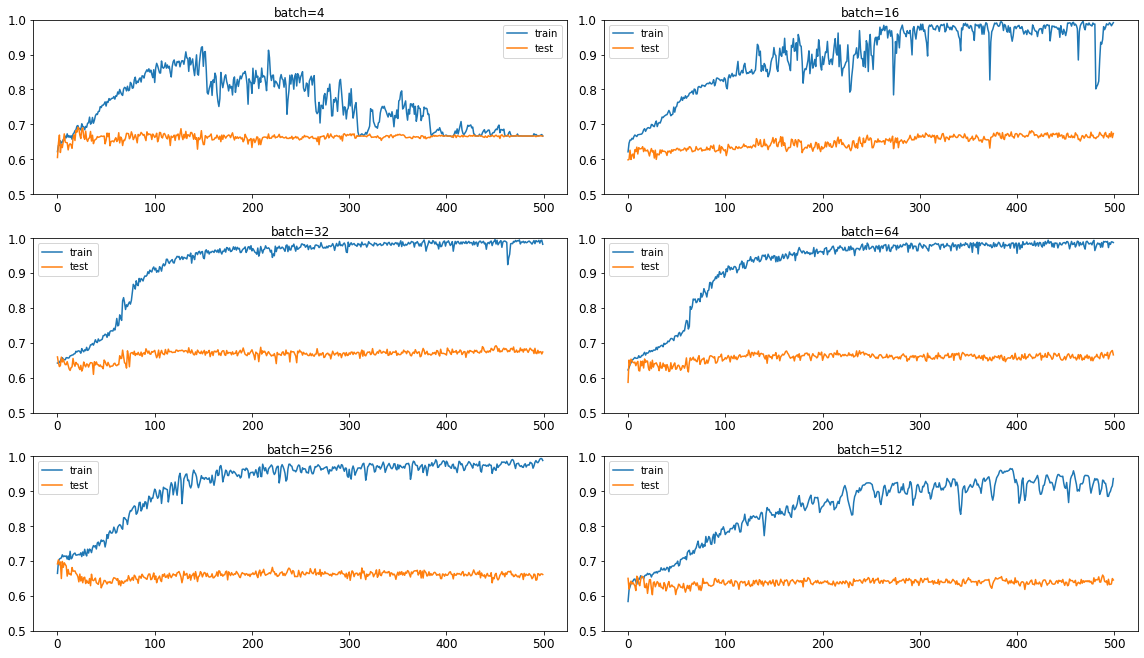

In [262]:
for count, history in enumerate(unpacked_results):
    # determine the plot number
    plt.rcParams['figure.figsize'] = [16, 12]
    plot_no = 420 + (count+1)
    plt.subplot(plot_no)
    plt.ylim(0.5, 1.0)
    plt.plot(history["history"]['accuracy'], label='train')
    plt.plot(history['history']['val_accuracy'], label='test')
    plt.legend()
    plt.title('batch='+str(history["batch_size"]), pad=-40)
    
plt.tight_layout()
    